<div style="width: 100%; margin: 0; padding: 20px; background-color: #2c3e50; color: white; border-radius: 10px; text-align: center; border: 2px solid #ecf0f1; box-sizing: border-box;">
  <h1 style="margin: 0; font-size: 24px; color: white;">MSIN0143: Programming for Business Analytics 25/26</h1>
  <h2 style="margin: 10px 0; font-size: 18px; color: #ecf0f1;">40% Group Coursework - Assignment</h2>
  <p style="margin: 5px 0; font-size: 14px; color: #ecf0f1; font-weight: bold;">GROUP 1, Team 8</p>
  <hr style="border: 0; height: 1px; background: rgba(255,255,255,0.3); margin: 15px 0;">
  <div style="font-size: 14px; color: white; line-height: 1.6;">
    <p style="margin: 2px;"><strong>Dimitrios Athinaios</strong> | 25192950</p>
    <p style="margin: 2px;"><strong>Maria Tsakiri</strong> | 25216041</p>
    <p style="margin: 2px;"><strong>Simon Kolarik</strong> | 25194218</p>
    <p style="margin: 8px 0 0 0; font-size: 12px; color: #ecf0f1;"><strong>Word count:</strong> 1996</p>
  </div> 
</div>

<hr>

# Table of Contents

- [0. INTRODUCTION & OBJECTIVES](#intro)
- [1. ENVIRONMENT SETUP](#setup)
- [2. DATA ACQUISITION AND DESCRIPTION](#data-acquisition)
  - [2a. Setup and Data Import](#data-import)
  - [2b. Time Filtering & Synchronization](#time-filter)
  - [2c. Pre-Cleaning EDA](#pre-clean-eda)
- [3. DATA CLEANING PIPELINE](#cleaning)
  - [3a. Housing Data Cleaning](#housing-clean)
  - [3b. Crime Data Cleaning](#crime-clean)
- [4. PRE-MERGE EDA](#pre-merge-eda)
  - [4a. House Only EDA](#house-eda)
  - [4b. Crime Only EDA](#crime-eda)
- [5. FEATURE ENGINEERING](#feature-eng)
  - [5a. Spatio-Temporal Join](#spatial-join)
  - [5b. Outlier Check](#outlier-check)
- [6. ADVANCED FEATURE ENGINEERING](#advanced-features)
- [7. POST-MERGE EDA](#post-merge-eda)
- [8. DATA PREPARATION FOR MODELLING](#data-prep)
- [9. MACHINE LEARNING MODELS](#ml-models)
  - [9.1 Polynomial Regression](#poly-reg)
  - [9.2 K-Nearest Neighbors](#knn)
  - [9.3 XGBoost](#xgboost)
- [10. PERFORMANCE EVALUATION](#evaluation)
- [11. CONCLUSION](#conclusion)
- [APPENDICES](#appendices)
  - [Appendix A: Generative AI](#appendix-a)
  - [Appendix B: Project Management](#appendix-b)
  - [Appendix C: Linear Regression](#appendix-c)
  - [Appendix D: Weighted Voting](#appendix-d)
- [REFERENCES](#references)


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #2c3e50; color: white; border-radius: 5px; text-align: center;">
  <h1 id="intro" style="margin: 0;">0. INTRODUCTION & OBJECTIVES</h1>
  <h3 style="margin: 0; color: #ecf0f1;">Context, Goals, and Data Selection</h3>
</div>


Crime is a critical concern for urban planning and law enforcement in London and a major factor when choosing where to live or invest. Understanding how local economic indicators, particularly property values, relate to criminal activity is essential for resource allocation and risk assessment.

This project uses data analytics to uncover statistical patterns linking wealth to specific crime types and police outcomes. Using two Kaggle datasets (London House Price Data and London Street-Level Crime Data), it explores the relationship between crime and socioeconomic factors across London.

To manage to create value and impact, we will attempt to create a custom "Opportunity Index" and identify areas that combine street safety and property affordability. We will train Machine Learning models like KNN, XGBoost to quantify the impact of specific crime types on property value.value.ues.ty value.

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #7f8c8d; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">1. ENVIRONMENT SETUP</h1>
<h3 style="margin: 0; color: #ecf0f1;">Automated Library Installation & Verification</h3>
</div>

In [13]:
# Before starting the analysis, we need to ensure that all the necessary tools are installed on your computer. 
# This script acts as an automated "system check." 
# It looks through a list of required Python libraries (like `pandas` for data, `seaborn` for charts, and `xgboost` for machine learning) 
# and checks if you have them.

# If a library is missing, the script will automatically install it for you using `pip`. 
# This ensures that the notebook runs smoothly on any machine without manual configuration errors.

# 1. environment setup (auto-installer)
import sys, subprocess  # tools to run terminal commands from python
# list of libraries we need for the project
packages = ["pandas", "numpy", "matplotlib", "seaborn", "folium", "scikit-learn", "xgboost", "optuna", "statsmodels"]
for pkg in packages:
    try: # 1. check if installed: handle weird names like 'scikit-learn' -> 'sklearn'
        import_name = "sklearn" if pkg == "scikit-learn" else pkg.replace("-", "_")        
        __import__(import_name)  # try to load it
        print(f"{pkg} Success")  # if successful, print checkmark
    except ImportError:
        print(f"installing {pkg}...")  # 2. if not found: install it using pip
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

pandas Success
numpy Success
matplotlib Success
seaborn Success
folium Success
scikit-learn Success
xgboost Success
optuna Success
statsmodels Success


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #2980b9; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">2. DATA ACQUISITION AND DESCRIPTION</h1>
<h3 style="margin: 0; color: #ecf0f1;">Sources, Characteristics, and Dimensions</h3>
</div>
</p>
</div>


To achieve our objective of identifying London neighbourhoods that offer an optimal balance of street safety and property affordability, we acquired data from two primary sources. Both datasets were retrieved in CSV format to facilitate robust data manipulation and feature engineering within the Python environment.

### Dataset 1: London House Price 2024 Data
* **Source:** Retrieved from [London House Price Data (Kaggle)](https://www.kaggle.com/datasets/jakewright/house-price-data/data).
* **Characteristics:** This dataset provides granular property-specific variables including full address, postcode, geospatial coordinates (longitude & latitude), room counts, floor area, property type, and energy rating. Crucially, it includes both current transaction prices and historical valuation data.
* **Dimensions:** The dataset comprises **9 columns** and **1,048,575 datapoints**.

### Dataset 2: London Street-Level Crime 2024 Data
* **Source:** Retrieved from [London Street-Level Crime Data 2024 (Kaggle)](https://www.kaggle.com/datasets/rahulladhani/london-street-level-crime-data-2024).
* **Characteristics:** This dataset reports detailed records of criminal incidents, categorized by crime type (e.g., Violence, Theft), specific location coordinates (longitude & latitude), responsible police force, and the final judicial outcome category.
* **Dimensions:** The dataset comprises **28 columns** and **418,201 datapoints**.

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #2980b9; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">2a. SETUP AND DATA IMPORT</h1>
<h3 style="margin: 0; color: #ecf0f1;">Loading Libraries and Raw Datasets</h3>
</div>

In [19]:
# In this step we:
# Import tools for data handling, visualisation, and machine learning
# Load the crime and housing datasets from local files (or GitHub as fallback)
# Create backups so we can safely modify the working copies
# ANYONE CAN DOWNLOAD IT AND RUN IT THEMSELVES!

# basic tools for data and math
import pandas as pd  # pandas is like excel for python, it holds our tables
import numpy as np   # numpy handles the heavy math calculations faster
import os            # lets us check if files exist on your computer

# visualisation tools
import matplotlib.pyplot as plt       # the basic graphing library
import matplotlib.dates as mdates     # helps charts understand dates (jan, feb...)
import seaborn as sns                 # makes the charts look cleaner and modern
import folium                         # allows us to make interactive maps
from folium.plugins import HeatMap    # specifically for the heatmap visuals

# machine learning tools
# we need this to split data into "study material" and "tests"
from sklearn.model_selection import train_test_split, cross_val_score

# tools to prepare the data for the models
from sklearn.preprocessing import (
    LabelEncoder,    # turns text like "flat" into numbers like "0"
    MinMaxScaler,    # shrinks numbers to a 0-1 range
    StandardScaler,  # standardizes data (good for linear regression)
    RobustScaler,    # handles data with crazy outliers (like mansions)
    PolynomialFeatures # creates curves to find non-linear patterns
)
# pipeline helps us chain steps together (like scaling -> predicting)
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# the actual machine learning models
from sklearn.linear_model import Ridge, LinearRegression # simple straight-line models
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor # complex tree models
from sklearn.neighbors import BallTree, KNeighborsRegressor # neighbor-based models
from sklearn.cluster import KMeans # clustering tool to find groups
import xgboost as xgb # the "pro" gradient boosting model (very accurate)

# advanced analysis tools
import optuna               # automated tool to find the best model settings
import statsmodels.api as sm # gives us statistical p-values
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # scoring metrics

# general settings
import warnings
warnings.filterwarnings('ignore') # hides annoying red warning text
pd.set_option('display.max_columns', None) # forces pandas to show every column

# defining where the files are
# using 'r' before the string stops python from getting confused by backslashes
local_crime = r"C:\Users\Dath\OneDrive\Desktop\UCL SCHOOL OF MANAGEMENT BA\Semester 1\MSIN0143 Programming for Business Analytics\GROUP PROJECT\DATASETS\London_Crimes_2024_Expanded.csv"
local_housing = r"C:\Users\Dath\OneDrive\Desktop\UCL SCHOOL OF MANAGEMENT BA\Semester 1\MSIN0143 Programming for Business Analytics\GROUP PROJECT\DATASETS\kaggle_london_house_price_data.csv"

# backup links just in case local files aren't found
url_crime = "https://github.com/daththeanalyst/London-SafeValue-Analytics/raw/refs/heads/main/London_Crimes_2024_Expanded.zip"
url_housing = "https://github.com/daththeanalyst/London-SafeValue-Analytics/raw/refs/heads/main/kaggle_london_house_price_data.zip"

try:
    # first, try to load the files from your computer (it's faster)
    df_cd = pd.read_csv(local_crime, low_memory=False)
    df_hp = pd.read_csv(local_housing)

except FileNotFoundError:
    # if the computer can't find them, download them from github automatically
    # pandas can unzip and read the file in one step
    print("local files not found. downloading from github...")
    df_hp = pd.read_csv(url_housing, compression='zip')
    df_cd = pd.read_csv(url_crime, compression='zip', low_memory=False)
    print("loaded data from cloud.")

# creating safety copies
# we do this so if we mess up the data later, we can restore it without reloading the files
df_cd_backup = df_cd.copy()
df_hp_backup = df_hp.copy()

# double check that we actually have data
print(f"crime rows:   {df_cd.shape[0]}")
print(f"housing rows: {df_hp.shape[0]}")

crime rows:   1048575
housing rows: 418201


In [20]:
# Take a quick look at the first few rows
display(df_cd.head(1))
display(df_hp.head(1))

,Crime ID,Month,Reported by,Crime type,Last outcome category,LSOA name,Location,Latitude,Longitude
0,e5b3ed0375b796067eb668f37a18094cce300bdbd5446c...,2024-01,Metropolitan Police Service,Other theft,Unable to prosecute suspect,Arun 001C,On or near Queen Street,50.853155,-0.552328


,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,rentEstimate_lowerPrice,rentEstimate_currentPrice,rentEstimate_upperPrice,saleEstimate_lowerPrice,saleEstimate_currentPrice,saleEstimate_upperPrice,saleEstimate_confidenceLevel,saleEstimate_ingestedAt,saleEstimate_valueChange.numericChange,saleEstimate_valueChange.percentageChange,saleEstimate_valueChange.saleDate,history_date,history_price,history_percentageChange,history_numericChange
0,"Flat 9, 35 Furnival Street, London, EC4A 1JQ",EC4A 1JQ,England,EC4A,51.517282,-0.110314,1.0,1.0,45.0,1.0,Leasehold,Purpose Built Flat,NaN,2100.0,2350.0,2600.0,570000.0,600000.0,630000.0,HIGH,2024-10-07T13:26:59.894Z,244000.0,68.539326,2010-03-30,1995-01-02,830000,NaN,NaN


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 15px; background-color: #3498db; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">2b. TIME FILTERING & SYNCHRONISATION</h1>
<h3 style="margin: 0; color: #ecf0f1;">Restricting Data to Jan 2024 – Sept 2024</h3>
</div></h4>
</div>

Both datasets are aligned to a common temporal window: January 1 - September 30, 2024. Date columns (history_date for housing, Month for crime) are converted to datetime objects, then filtered to retain only 2024 records, removing historical data from 1995-2023.​

This temporal alignment is critical for validity: it ensures prices reflect current market conditions and crime data corresponds to those conditions. Both variables are volatile, neighbourhoods change over time (areas dangerous in 2010 may be safe in 2024), and prices fluctuate with inflation and supply-demand forces. Filtering also removes thousands of irrelevant rows, making subsequent spatial joins faster and more efficient.

In [24]:
# first, we need to make sure python understands that these columns are dates, not just text
# if we don't do this, we can't filter by time properly
df_hp['history_date'] = pd.to_datetime(df_hp['history_date'])
df_cd['Month'] = pd.to_datetime(df_cd['Month'])

# setting our strict time window
# we only want data from 2024 to keep the analysis current
start_date = '2024-01-01'
end_date = '2024-09-30'

# filtering the housing data
# using .copy() here is important because it tells pandas to create a fresh table
# rather than just a "view" of the old one, which prevents errors later
df_hp_2024 = df_hp[(df_hp['history_date'] >= start_date) & (df_hp['history_date'] <= end_date)].copy()

# filtering the crime data
df_cd_2024 = df_cd[(df_cd['Month'] >= start_date) & (df_cd['Month'] <= end_date)].copy()

# verification
# it's always good to check how many rows we have left after filtering
print(f"housing rows filtered: {df_hp_2024.shape[0]}")
print(f"crime rows filtered:   {df_cd_2024.shape[0]}")

# taking a quick look at the housing data to make sure it looks right
display(df_hp_2024[['history_date', 'history_price', 'postcode', 'latitude', 'longitude']].head())

housing rows filtered: 27281
crime rows filtered:   849468


,history_date,history_price,postcode,latitude,longitude
390920,2024-01-02,345000,SW2 2ET,51.450615,-0.114522
390921,2024-01-02,6000000,NW8 7HN,51.529405,-0.169313
390922,2024-01-02,715000,W2 2YF,51.513328,-0.164841
390923,2024-01-02,450000,SE3 8HT,51.470882,0.033571
390924,2024-01-02,855000,NW7 3SP,51.618431,-0.258514


In [25]:
# Use these to make sure that it has filtered correctly because head is insufficient
# Use function unique() to display unique values
display(df_hp_2024['history_date'].unique())
display(df_cd_2024['Month'].unique())

<DatetimeArray>
['2024-01-02 00:00:00', '2024-01-03 00:00:00', '2024-01-04 00:00:00',
 '2024-01-05 00:00:00', '2024-01-06 00:00:00', '2024-01-07 00:00:00',
 '2024-01-08 00:00:00', '2024-01-09 00:00:00', '2024-01-10 00:00:00',
 '2024-01-11 00:00:00',
 ...
 '2024-09-12 00:00:00', '2024-09-13 00:00:00', '2024-09-16 00:00:00',
 '2024-09-17 00:00:00', '2024-09-18 00:00:00', '2024-09-19 00:00:00',
 '2024-09-20 00:00:00', '2024-09-23 00:00:00', '2024-09-25 00:00:00',
 '2024-09-27 00:00:00']
Length: 225, dtype: datetime64[ns]

<DatetimeArray>
['2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00', '2024-08-01 00:00:00', '2024-09-01 00:00:00']
Length: 9, dtype: datetime64[ns]

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #16a085; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">2c. PRE-CLEANING EDA & SUMMARY STATISTICS</h1>
<h3 style="margin: 0; color: #ecf0f1;">Initial Profiling, Data Distributions, and Quality Checks</h3>
</div>

In [28]:
# Summary statistics are reviewed to identify data leakage risks, biases,
# and quality issues before building the cleaning pipeline.

print("\n\nxx" + "="*20 + " HOUSE PRICE DATA (2024) " + "="*20 + "xx")

print("\n--- Missing Data (Percentage of Total Rows) ---")
# Calculate missing value percentage: (Count of Nulls / Total Rows) * 100
missing_percent = (df_hp_2024.isnull().sum() / len(df_hp_2024)) * 100
# Filter to show only columns with > 0% missing and format to 2 decimal places
missing_data_percent = missing_percent[missing_percent > 0]
print(missing_data_percent.apply(lambda x: f"{x:.2f}%"))

# FINDING: Several variables show high missing rates (bathrooms, bedrooms,
# floorAreaSqM, livingRooms, currentEnergyRating). Will impute with median
# for discrete count variables and mean for continuous variables.
# currentEnergyRating will be dropped due to high missing rate and low relevance.

# FINDING: Estimated and change-related price columns were identified and will
# be removed to prevent data leakage. Analysis relies on actual transaction prices.

print("\n\nxx" + "="*20 + " CRIME DATA (2024) " + "="*20 + "xx")

print("\n--- Missing Data (Percentage of Total Rows) ---")
missing_percent = (df_cd_2024.isnull().sum() / len(df_cd_2024)) * 100
missing_data_percent = missing_percent[missing_percent > 0]
print(missing_data_percent.apply(lambda x: f"{x:.2f}%"))

print("\n--- Outcome Categories ---")
print(df_cd_2024['Last outcome category'].value_counts().head(10))

# FINDING: Over 60% of outcomes are unresolved, making this variable too
# imbalanced to use as a predictive target. Removed from analysis.



xx==================== HOUSE PRICE DATA (2024) ====================xx

--- Missing Data (Percentage of Total Rows) ---
bathrooms                                    17.64%
bedrooms                                      9.16%
floorAreaSqM                                 12.71%
livingRooms                                  13.99%
tenure                                        4.79%
propertyType                                  1.06%
currentEnergyRating                           9.34%
rentEstimate_lowerPrice                       1.12%
rentEstimate_currentPrice                     1.12%
rentEstimate_upperPrice                       1.12%
saleEstimate_lowerPrice                       0.12%
saleEstimate_currentPrice                     0.12%
saleEstimate_upperPrice                       0.12%
saleEstimate_confidenceLevel                  0.12%
saleEstimate_ingestedAt                       0.12%
saleEstimate_valueChange.numericChange        0.12%
saleEstimate_valueChange.percentageChange     0

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #2980b9; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">3. DATA CLEANING PIPELINE</h1>
</div>

We implemented a data cleaning pipeline focused on three principles:

**Completeness**: Imputing missing values using domain-specific strategies.

**Relevance**: Removing non-predictive features and leakage-prone variables.

**Consistency**: Aligning timeframes and geospatial references across datasets for accurate merging.

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 15px; background-color: #3498db; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">3a. HOUSING DATA CLEANING & PREPROCESSING</h1>
<h3 style="margin: 0; color: #ecf0f1;">Leakage Removal, Smart Imputation, and Hygiene</h3>
</div>

For the housing dataset, we removed columns with estimated values (data leakage), irrelevant fields (rental estimates, full addresses), and applied median imputation for discrete counts (bedrooms, bathrooms) and mean imputation for continuous variables (floor area). Non-residential transactions were filtered out using a £50,000 minimum price threshold.

In [35]:
# looping through every single column in our raw data
for col in df_hp_2024.columns:
    
    # printing how many unique values are in that column
    # if a column has only 1 unique value (e.g. "country" is always "england"), it's useless to us
    # if a column has 25,000 unique values (like "address"), it's just noise
    print(f'Column {col} has {df_hp_2024[col].nunique()} unique values.')

Column fullAddress has 18586 unique values.
Column postcode has 14711 unique values.
Column country has 1 unique values.
Column outcode has 159 unique values.
Column latitude has 16553 unique values.
Column longitude has 16589 unique values.
Column bathrooms has 9 unique values.
Column bedrooms has 9 unique values.
Column floorAreaSqM has 389 unique values.
Column livingRooms has 7 unique values.
Column tenure has 4 unique values.
Column propertyType has 19 unique values.
Column currentEnergyRating has 7 unique values.
Column rentEstimate_lowerPrice has 443 unique values.
Column rentEstimate_currentPrice has 475 unique values.
Column rentEstimate_upperPrice has 504 unique values.
Column saleEstimate_lowerPrice has 2679 unique values.
Column saleEstimate_currentPrice has 2807 unique values.
Column saleEstimate_upperPrice has 2925 unique values.
Column saleEstimate_confidenceLevel has 3 unique values.
Column saleEstimate_ingestedAt has 4 unique values.
Column saleEstimate_valueChange.num

In [36]:
# crime data cleaning & processing
# making a copy so we don't mess up the original raw data
df_hp_clean = df_hp_2024.copy()

# defining the list of columns we want to remove
cols_to_drop = [
    # group a: cheating / leakage
    # these columns are predictions made by the website or future data
    # if we use them, the model is 'cheating' because it knows the answer
    # this is called data leakage and it would give us unrealistic results
    'history_numericChange', 'history_percentageChange', 
    'saleEstimate_upperPrice', 'saleEstimate_lowerPrice', 
    'saleEstimate_currentPrice', 'saleEstimate_confidenceLevel', 
    'saleEstimate_ingestedAt', 'saleEstimate_valueChange.numericChange', 
    'saleEstimate_valueChange.percentageChange', 'saleEstimate_valueChange.saleDate',
    
    # group b: irrelevant info
    # we are predicting sale price, so rental estimates are distractions
    'rentEstimate_lowerPrice', 
    'rentEstimate_currentPrice', 
    'rentEstimate_upperPrice',
    
    # group c: noise / useless text
    # we have latitude/longitude, so we don't need text postcodes
    'postcode',
    # addresses are too specific, and 'country' is the same for every row
    'fullAddress', 'outcode', 'country',
    # Will also remove energy rating, too many missing values
    'currentEnergyRating'
]

# actually dropping the columns now
# errors='ignore' means 'if it's already gone, don't crash, just keep going'
df_hp_clean = df_hp_clean.drop(columns=[c for c in cols_to_drop if c in df_hp_clean.columns], errors='ignore')

# smart imputation (filling in the missing blanks)
# for size (sqm), we use the mean (average) because size is a continuous number
df_hp_clean['floorAreaSqM'] = df_hp_clean['floorAreaSqM'].fillna(df_hp_clean['floorAreaSqM'].mean())

# for rooms, we use the median (middle number)
# we do this because you can't have 2.5 bedrooms, and median ignores huge mansions
df_hp_clean['bedrooms'] = df_hp_clean['bedrooms'].fillna(df_hp_clean['bedrooms'].median())
df_hp_clean['bathrooms'] = df_hp_clean['bathrooms'].fillna(df_hp_clean['bathrooms'].median())
df_hp_clean['livingRooms'] = df_hp_clean['livingRooms'].fillna(df_hp_clean['livingRooms'].median())

# final cleanup
# for category text like 'leasehold', we can't guess the value
# since only a tiny % is missing, it's safer to just delete those rows
df_hp_clean = df_hp_clean.dropna(subset=['tenure', 'propertyType'])
# drops null values of the columns

# verification
print("housing data cleaned successfully.")
print(f"original shape: {df_hp_2024.shape}")
print(f"final shape:    {df_hp_clean.shape}")

# double check to make sure no nulls are left hiding
remaining_nulls = df_hp_clean.isnull().sum().sum()
if remaining_nulls == 0:
    print("no missing values remaining.")
else:
    print(f"warning: {remaining_nulls} missing values left.")

housing data cleaned successfully.
original shape: (27281, 28)
final shape:    (25961, 10)
no missing values remaining.


In [37]:
df_hp_clean.head()

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,history_date,history_price
390920,51.450615,-0.114522,1.0,3.0,72.000000,1.0,Leasehold,Purpose Built Flat,2024-01-02,345000
390921,51.529405,-0.169313,1.0,2.0,96.844419,1.0,Leasehold,Flat/Maisonette,2024-01-02,6000000
390922,51.513328,-0.164841,1.0,2.0,67.000000,1.0,Leasehold,Flat/Maisonette,2024-01-02,715000
390923,51.470882,0.033571,2.0,3.0,112.000000,1.0,Freehold,Semi-Detached House,2024-01-02,450000
390924,51.618431,-0.258514,2.0,3.0,188.000000,3.0,Freehold,Semi-Detached House,2024-01-02,855000


Following the initial statistical review, substitutions (of missing values with mean/median), and removal of features with excessive missingness or low relevance, we dropped 18 columns as well as approximately 1300 rows. This reduction represents a small fraction of the total dataset, ensuring that our final sample remains statistically robust while being free of records that could distort the model.

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 15px; background-color: #3498db; color: white; border-radius: 5px; text-align: center;">
<h2 style="margin: 0;">3b. CRIME DATA CLEANING & PREPROCESSING</h2>
<h4 style="margin: 0; color: #ecf0f1;">Geospatial Filtering, Severity Weighting, and Aggregation</h4>
</div>

For the crime data, we validated coordinates by removing missing or invalid locations (e.g., entries outside UK latitude range), removed duplicates and administrative fields, and aggregated incidents by location and month to compress millions of records into unique spatial points.

In [42]:
# 1. setup
# grabbing the 2024 data we filtered earlier
df_crime_clean = df_cd_2024.copy()
print(f"original row count: {len(df_crime_clean)}")

# 2. geospatial cleaning
# we need exact locations for the map. if lat/long is missing, the row is useless.
df_crime_clean = df_crime_clean.dropna(subset=['Latitude', 'Longitude'])

# filtering for valid uk coordinates within the Greater London Area
# Latitude: 51.2 to 51.7 | Longitude: -0.6 to 0.4
df_crime_clean = df_crime_clean[
    (df_crime_clean['Latitude'] > 51.2) & 
    (df_crime_clean['Latitude'] < 51.7) &
    (df_crime_clean['Longitude'] > -0.6) & 
    (df_crime_clean['Longitude'] < 0.4)
]

# 3. drop irrelevant columns
# removing administrative text columns we don't need for the math model
cols_to_drop = [
    'Crime ID', 'Reported by', 'Falls within', 
    'LSOA code', 'LSOA name', 
    'Location', 'Last outcome category'
]
# using errors='ignore' so it doesn't crash if we accidently run this cell twice
df_crime_clean = df_crime_clean.drop(columns=[c for c in cols_to_drop if c in df_crime_clean.columns], errors='ignore')

# 4. aggregation (the compressor)
# we shrink the dataset by grouping specific locations and months together.
# instead of 10 rows for 10 crimes, we get 1 row with a total count.
# (Severity summation removed as requested)
df_crime_grouped = df_crime_clean.groupby(['Latitude', 'Longitude', 'Month']).agg(
    local_crime_count=('Crime type', 'count')       # how many crimes happened here?
).reset_index()

# verification
print("crime data cleaned & aggregated.")
print(f"final compressed shape: {df_crime_grouped.shape}")
display(df_crime_grouped.head())

original row count: 849468
crime data cleaned & aggregated.
final compressed shape: (286637, 4)


,Latitude,Longitude,Month,local_crime_count
0,51.203239,0.266158,2024-02-01,1
1,51.210968,0.276646,2024-08-01,1
2,51.212192,-0.394476,2024-08-01,2
3,51.225563,-0.365797,2024-02-01,1
4,51.225829,-0.329253,2024-02-01,1


In [43]:
# missing value detection

# calculating the total number of empty cells in each column
null_counts = df_hp_clean.isnull().sum()
null_counts2 = df_crime_clean.isnull().sum()

# filtering the list to show ONLY the columns that have missing data
# if everything is clean, this will print an empty list
print(null_counts[null_counts > 0])
print(null_counts2[null_counts2 > 0])

#Both clean

Series([], dtype: int64)
Series([], dtype: int64)


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #16a085; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">4. PRE-MERGE EXPLORATORY DATA ANALYSIS</h1>
<h3 style="margin: 0; color: #ecf0f1;">Visualising Independent Trends in Market & Safety</h3>
</div>

Prior to integration, independent EDA for each dataset was performed to verify the structural integrity of each source and prevent data quality issues, minimising integration risks and challenges when working with the merged dataframe. 

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #16a085; color: white; border-radius: 5px; text-align: center;">
    <h1 style="margin: 0;">4a. HOUSE ONLY EDA</h1>
    <h3 style="margin: 0; color: #ecf0f1;">Analysis of Price Distributions, Property Types, and Trends</h3>
</div>

For the House Price Data, we created 4 visualisations as appeared to be the most valuable ones, with key insights derived from them: 

**Histogram of House Price Distribution**: The distribution is heavily right-skewed, with most properties concentrated in the £0.25-0.75M range. The peak occurs around £0.45M, indicating this is the most common price point. Properties above £1.0M drop off sharply, revealing a small number of luxury homes at the high end.

**Mean Price by Property Type**: End Terrace Bungalows are the least expensive (price <£0.5M), while Detached properties command the highest average prices (>£2M). Error bars indicate substantial variability within each property type category.

**Boxplot of Price Distribution by Bedroom Count**: Median prices rise steadily as bedroom count increases from 1 to 6 bedrooms. However, significant range overlap across categories suggests location is a major price determinant beyond just bedroom count. The 2-bedroom category shows numerous outliers, indicating substantial price variation driven by location.

**Scatterplot of Floor Area vs. Price**: A clear positive correlation exists between floor area (square meters) and price. Smaller properties show tight price clustering around the £0.75M standard London property profile, while larger properties exhibit wide price variation. This increasing variance at higher sizes suggests that factors beyond square footage (such as location and quality) become more influential for larger homes.



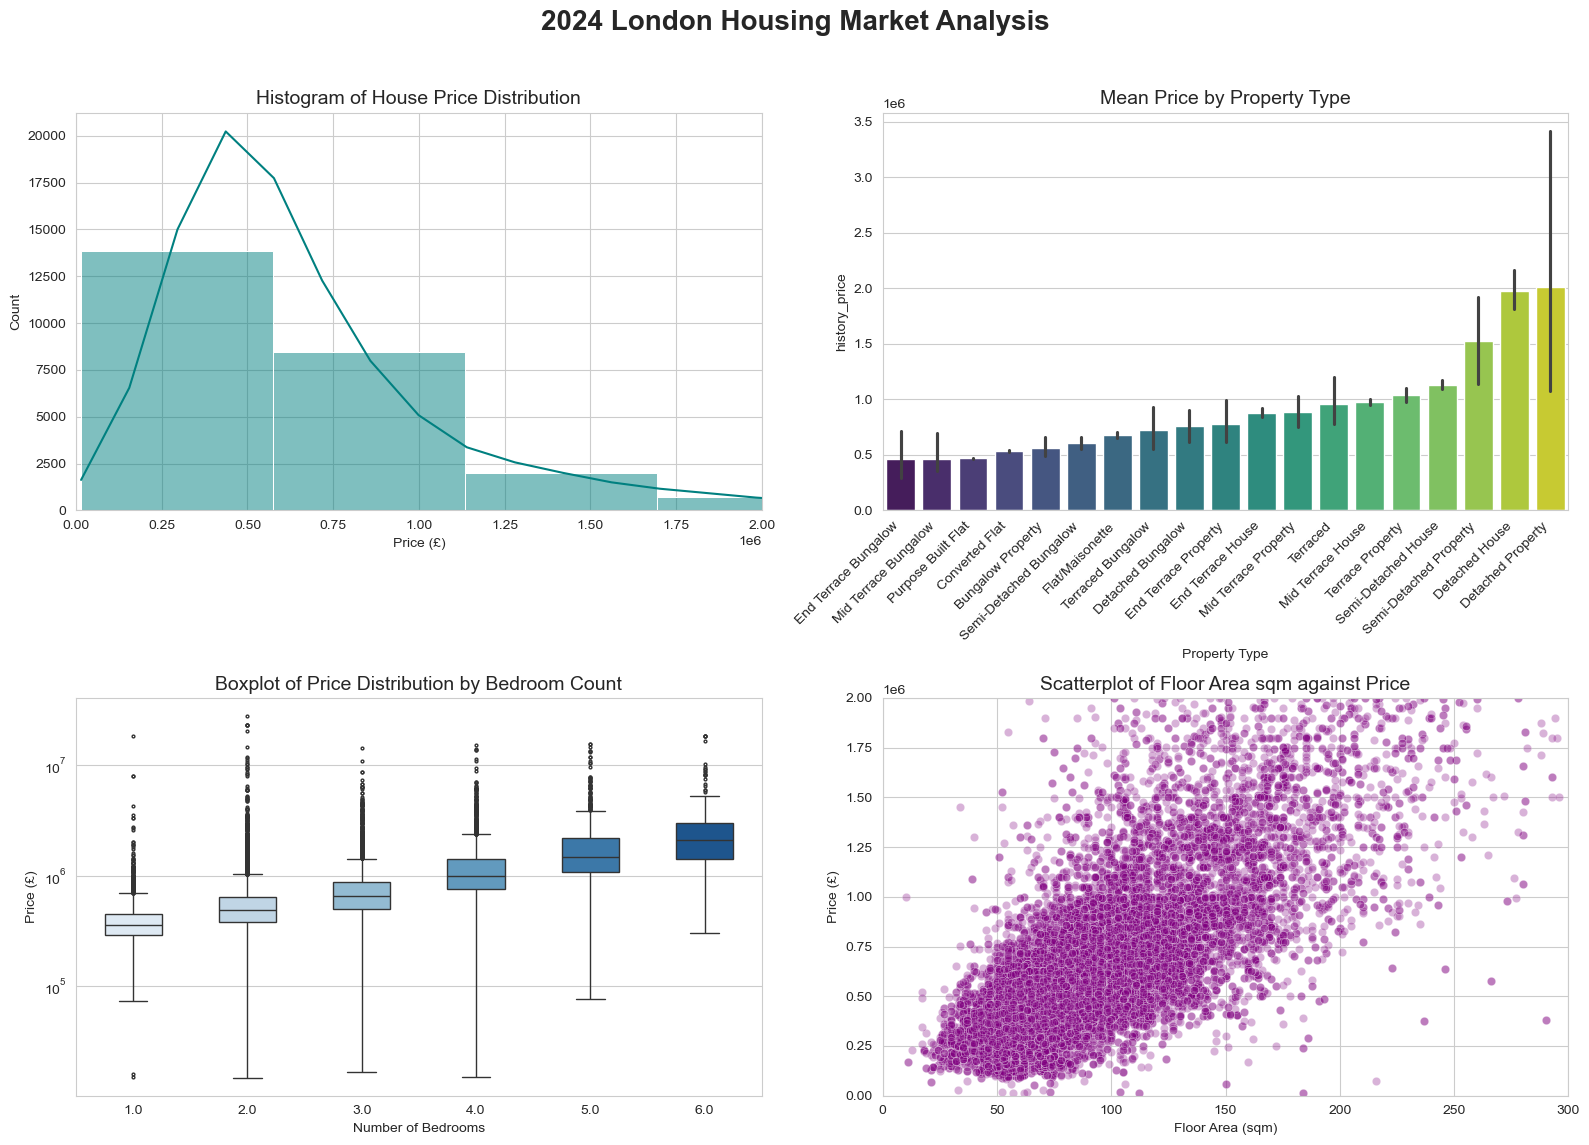

In [50]:
area_col = 'floorAreaSqM' 

# find the most common floor area value in the cleaned housing data
# this helps detect a suspicious spike in the data (for example, many flats all recorded with the same area)
auto_spike = df_hp_clean[area_col].mode()[0] # In this case its the Imputated medians/means

# choose which spike value to use
# use auto_spike
target_spike = auto_spike 

# -------------------------------------------------------------------
# figure and style setup
# -------------------------------------------------------------------

# set a clean white background style for all seaborn plots
sns.set_style("whitegrid")

# create a figure with 2 rows and 2 columns of subplots
# fig is the whole figure, axes is a 2x2 array of subplot axes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# add a main title across the whole figure
fig.suptitle('2024 London Housing Market Analysis', fontsize=20, weight='bold')

# -------------------------------------------------------------------
# top left: histogram of house prices
# -------------------------------------------------------------------

# draw a histogram of history_price with 50 bins and a smooth density curve (kde)
sns.histplot(
    df_hp_clean['history_price'],
    bins=50,
    kde=True,
    color='teal',
    ax=axes[0, 0]
)

# set subplot title and x label
axes[0, 0].set_title('Histogram of House Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price (£)')

# limit the x axis so we focus on properties up to £2 million
axes[0, 0].set_xlim(0, 2_000_000)

# -------------------------------------------------------------------
# top right: mean price by property type
# -------------------------------------------------------------------

# create a bar chart showing average history_price per propertyType
# estimator='mean' means seaborn calculates the mean value for each category
# palette='viridis' chooses a colour gradient
# order=... sorts the bars from cheapest to most expensive based on the mean price
sns.barplot(
    data=df_hp_clean,
    x='propertyType',
    y='history_price',
    estimator='mean',
    palette='viridis',
    ax=axes[0, 1],
    order=df_hp_clean.groupby("propertyType")["history_price"]
                     .mean()
                     .sort_values()
                     .index
)

axes[0, 1].set_title('Mean Price by Property Type', fontsize=14)
axes[0, 1].set_xlabel('Property Type')

# rotate the x labels so they do not overlap and are easier to read
axes[0, 1].set_xticklabels(
    axes[0, 1].get_xticklabels(),
    rotation=45,
    ha='right'
)

# -------------------------------------------------------------------
# bottom left: boxplot of price by bedroom count
# -------------------------------------------------------------------

# keep only properties with 6 bedrooms or fewer
# this removes very large houses that could distort the scale
df_bed_filter = df_hp_clean[df_hp_clean['bedrooms'] <= 6]

# draw a boxplot of history_price for each bedroom count
# width controls how wide the boxes are
# fliersize controls the size of the outlier points
sns.boxplot(
    data=df_bed_filter,
    x='bedrooms',
    y='history_price',
    palette='Blues',
    ax=axes[1, 0],
    width=0.5,
    fliersize=2
)

axes[1, 0].set_title('Boxplot of Price Distribution by Bedroom Count', fontsize=14)
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Price (£)')

# use a logarithmic y axis so we can see both cheaper and very expensive properties on the same plot
axes[1, 0].set_yscale('log')

# -------------------------------------------------------------------
# bottom right: scatterplot of floor area vs price, spike removed
# -------------------------------------------------------------------

# first, keep only properties with floor area under 300 sqm
# this removes extremely large properties that would stretch the x axis
df_area_filter = df_hp_clean[df_hp_clean[area_col] < 300]

# then remove the spike around the target_spike value
# .between(a, b) is true for values in [a, b]
# ~ in front inverts the boolean mask, so we keep only rows outside this range
df_clean_scatter = df_area_filter[
    ~df_area_filter[area_col].between(target_spike - 0.5, target_spike + 0.5)
]

# draw a scatterplot of floor area vs history_price
# alpha makes the points semi transparent so dense regions are visible
sns.scatterplot(
    data=df_clean_scatter,
    x=area_col,
    y='history_price',
    alpha=0.3,
    color='purple',
    ax=axes[1, 1]
)

axes[1, 1].set_title('Scatterplot of Floor Area sqm against Price', fontsize=14)
axes[1, 1].set_xlabel('Floor Area (sqm)')
axes[1, 1].set_ylabel('Price (£)')

# restrict x and y axes so the main cluster is clearly visible
axes[1, 1].set_xlim(0, 300)
axes[1, 1].set_ylim(0, 2_000_000)

# -------------------------------------------------------------------
# final layout adjustments
# -------------------------------------------------------------------

# adjusting spacing between subplots so titles and labels do not overlap
# rect reserves some space at the top for the main figure title
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

# display the complete 2x2 figure
plt.show()

In [51]:
# describe() gives you count, mean, min, max for numerical columns
display(df_hp_2024[['history_price', 'floorAreaSqM', 'bedrooms']].describe().round(2))

,history_price,floorAreaSqM,bedrooms
count,27281.00,23814.00,24782.00
mean,777553.64,96.84,2.51
std,1033700.61,52.80,1.16
min,14750.00,10.00,1.00
25%,395000.00,63.00,2.00
50%,545000.00,83.00,2.00
75%,825000.00,113.00,3.00
max,42000000.00,499.00,9.00


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #16a085; color: white; border-radius: 5px; text-align: center;">
    <h1 style="margin: 0;">4b. CRIME ONLY EDA</h1>
    <h3 style="margin: 0; color: #ecf0f1;">Analysis of Crime Volumes, Types, and Spatial Distribution</h3>
</div>

**Top 10 Most Common Crimes in London (2024)**: "Violence and sexual offences" ranks highest with nearly 190,000 incidents, followed by "Anti-social behaviour." Drugs crimes are the least frequent with only 25,000 reports, 86% lower than Violence.

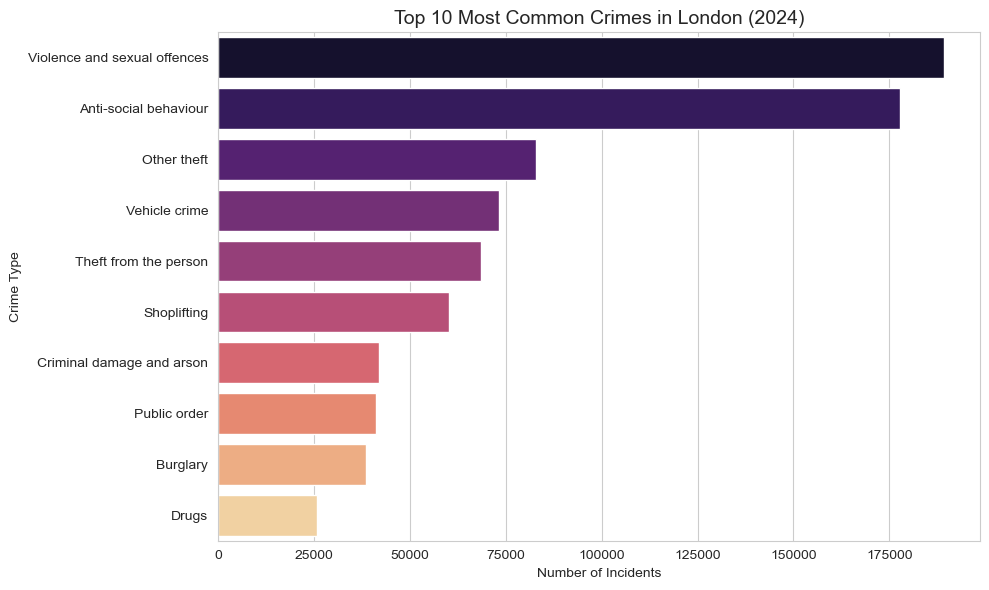

In [55]:
# Setup style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Data Processing: Count the raw occurrences of each crime type
crime_type_counts = df_crime_clean['Crime type'].value_counts().head(10)

# Create Bar Plot
sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, palette='magma')

# Formatting
plt.title('Top 10 Most Common Crimes in London (2024)', fontsize=14)
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')

plt.tight_layout()
plt.show()

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #8e44ad; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">5a. FEATURE ENGINEERING: THE SPATIO-TEMPORAL JOIN</h1>
<h3 style="margin: 0; color: #ecf0f1;">Merging Data via Month-Specific 500m Radius Queries</h3>
</div>

This section executes a Spatio-Temporal Join to link housing and crime datasets based on proximity and timing, since they lack a shared identifier.

**Parameter Definition**: A 500m radius is established and converted to radians for accurate distance calculations using the Haversine formula.

**Temporal Segmentation**: The code iterates month by month, matching each housing transaction only with crimes that occurred in the same month, avoiding time mismatches.

**Spatial Indexing (BallTree)**: For each month, a BallTree spatial structure is built from crime locations to enable fast nearest neighbour searches.

**Query and Extraction**: For every house, the BallTree retrieves all crime points within 500m and returns their row indices.

**Data Integration**: These indices are mapped back to the full crime table, and a new column, nearby_crime_ids, is added to the housing dataframe, storing the list of crime ids associated with each property sale.

In [59]:
# 1. setup
# creating a copy of the housing data
df_merged = df_hp_clean.copy()
# preparing a list to store the MATCHES (not the counts/scores yet)
crime_matches = []
indices_to_match = [] 
# 2. define parameters
# balltree uses radians: 500m / earth radius
radius_rad = 500 / 6371000 
# 3. the loop (iterate by month)
unique_months = df_merged['history_date'].dt.to_period('M').unique()
print(f"processing {len(unique_months)} months of data...")
for month in unique_months:
    # a. filter data for this specific month
    month_start = month.start_time
    month_end = month.end_time
    mask_housing = (df_merged['history_date'] >= month_start) & (df_merged['history_date'] <= month_end)
    chunk_housing = df_merged[mask_housing]
    mask_crime = (df_crime_grouped['Month'] == month_start)
    chunk_crime = df_crime_grouped[mask_crime]
    # safety check
    if len(chunk_housing) == 0 or len(chunk_crime) == 0:
        empty_lists = [[] for _ in range(len(chunk_housing))] # list of empty lists
        crime_matches.extend(empty_lists)
        indices_to_match.extend(chunk_housing.index)
        continue
     # b. build balltree (spatial index)
    # Converting degrees to radians (required by BallTree)
    crime_rad = np.deg2rad(chunk_crime[['Latitude', 'Longitude']].values)
    house_rad = np.deg2rad(chunk_housing[['latitude', 'longitude']].values)
    
    # Building the tree on the CRIME locations
    tree = BallTree(crime_rad, metric='haversine')
    
    # c. query the tree
    # Finds all crime points within radius_rad for every house
    # Returns a list of arrays. Each array contains the LOCAL indices (0, 1, 2...) of the chunk.
    local_indices_list = tree.query_radius(house_rad, r=radius_rad)
    
    # d. map to global indices and store
    # We need the REAL row IDs from df_crime_grouped, not just the 0-100 index of this chunk.
    # We create a map: Local Index -> Global Index
    global_lookup = chunk_crime.index.values
    
    for local_indices in local_indices_list:
        if len(local_indices) > 0:
            # Translate local ID to global ID
            real_crime_ids = global_lookup[local_indices]
            crime_matches.append(real_crime_ids)
        else:
            # No crimes found nearby
            crime_matches.append([])
            
    # Track which house these matches belong to
    indices_to_match.extend(chunk_housing.index)

# 4. Finalising the Join
# We create a temporary Series to hold the lists of crime IDs
# We index it by the house ID so we can join it safely
s_matches = pd.Series(crime_matches, index=indices_to_match, name='nearby_crime_ids')

# Join this new column to your main housing dataframe
df_merged = df_merged.join(s_matches)

# 5. Verification
print(f"Join complete. Merged shape: {df_merged.shape}")
print("Sample of the new column (lists of crime IDs):")
print(df_merged['nearby_crime_ids'].head())
print(df_merged)

processing 9 months of data...
Join complete. Merged shape: (25961, 11)
Sample of the new column (lists of crime IDs):
390920    [56019, 60493, 58688, 58240, 59183, 61358, 603...
390921    [161850, 164707, 166821, 163954, 167792, 17146...
390922    [144321, 139803, 143591, 144935, 146755, 14128...
390923    [81094, 77921, 79691, 79176, 79887, 79207, 784...
390924    [272900, 272170, 271760, 272358, 274051, 27397...
Name: nearby_crime_ids, dtype: object
         latitude  longitude  bathrooms  bedrooms  floorAreaSqM  livingRooms  \
390920  51.450615  -0.114522        1.0       3.0     72.000000          1.0   
390921  51.529405  -0.169313        1.0       2.0     96.844419          1.0   
390922  51.513328  -0.164841        1.0       2.0     67.000000          1.0   
390923  51.470882   0.033571        2.0       3.0    112.000000          1.0   
390924  51.618431  -0.258514        2.0       3.0    188.000000          3.0   
...           ...        ...        ...       ...           ...

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #8e44ad; color: white; border-radius: 5px; text-align: center;">
    <h1 style="margin: 0;">5b. OUTLIER CHECK: SUSPICIOUS LOW PRICES</h1>
    <h3 style="margin: 0; color: #ecf0f1;">Investigating and Filtering Unrealistically Cheap Housing Records</h3>
</div>

EDA revealed a cluster of transactions below £50,000, insufficient for standard London residential properties and likely indicating data errors or atypical sales. A minimum threshold of £50,000 was established to filter outliers and prevent disproportionate influence on the price-normalised evaluation metric.

found 71 properties under £100k.
sample of suspicious values:


,history_price,propertyType,bedrooms,floorAreaSqM
402400,14750,Purpose Built Flat,2.0,112.0
402313,14750,Purpose Built Flat,2.0,112.0
392100,15000,End Terrace House,4.0,184.0
392243,15000,End Terrace House,4.0,184.0
416623,15000,NaN,NaN,NaN
414443,15000,Converted Flat,2.0,62.0
416666,15000,NaN,NaN,NaN
397270,15000,Converted Flat,1.0,NaN
400269,16000,Converted Flat,1.0,57.0
404993,16500,Purpose Built Flat,3.0,104.0


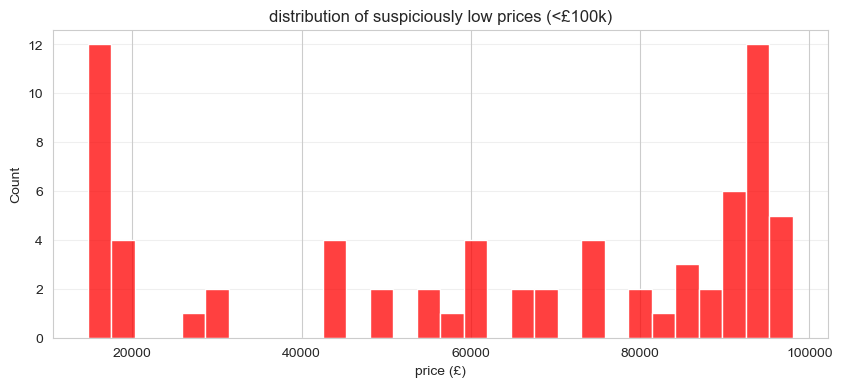

In [63]:
# outlier investigation
# we suspect some rows are not actual houses (e.g. £15k is likely a parking space).
# let's visualise the data to confirm this before we clean it.
# filtering for anything under £100k to see what's going on at the bottom
cheap_houses = df_hp_2024[df_hp_2024['history_price'] < 100000]
print(f"found {len(cheap_houses)} properties under £100k.")
print("sample of suspicious values:")
# showing the type and size to see if they make sense (e.g. 4 beds for £15k?)
display(cheap_houses[['history_price', 'propertyType', 'bedrooms', 'floorAreaSqM']].sort_values('history_price').head(10))
# visualisation
plt.figure(figsize=(10, 4))
# plotting the histogram to see if there's a distinct "cluster" of bad data
sns.histplot(cheap_houses['history_price'], bins=30, color='red')
plt.title('distribution of suspiciously low prices (<£100k)', fontsize=12)
plt.xlabel('price (£)')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [64]:
# make a copy of the merged dataframe so we do not alter the original
df_working = df_merged.copy()
# count how many rows we start with
initial_count = len(df_working)
# set the minimum valid price for london properties
min_price = 50000
# show the user what filter we are applying
print(f"Filtering criteria:")
print(f" - Keeping prices ABOVE: £{min_price:,.0f}")
# create a boolean mask that is true for rows where price is at least £50,000
# this helps remove suspicious very low prices that are probably data errors or non standard sales
mask_valid_price = (df_working['history_price'] >= min_price)
# apply the mask to keep only rows with valid prices
df_cleaned = df_working[mask_valid_price].copy()
# calculate how many rows we removed
dropped_count = initial_count - len(df_cleaned)
# show the user the outcome of the filter
print(f"\nResult:")
print(f" - Rows dropped: {dropped_count}")
print(f" - Remaining rows: {len(df_cleaned)}")

Filtering criteria:
 - Keeping prices ABOVE: £50,000

Result:
 - Rows dropped: 18
 - Remaining rows: 25943


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #9b59b6; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">6. ADVANCED FEATURE ENGINEERING (POST-MERGE)</h1>
<h3 style="margin: 0; color: #ecf0f1;">Creating the 'Opportunity Index', Location Clusters, and Ratios</h3>
</div>

To identify "safe and affordable" areas, we engineered several standardised features:
 

**Normalised Price (norm_price)**: Captures price per square meter to enable fair comparison across property sizes. A £500k studio is expensive relative to size, whereas a £500k mansion is cheap.

The formula used is: $$NormPrice = \frac{Historical Price}{Floor Area}$$ 
 

**Local Crime Count**: Aggregates total incidents per area to account for area-size biases.

The formula used is: $$LocalCrimeCount= \sum_{i=1}^{n} (CrimeCount)$$ 

**Average Severity Score**: Quantifies danger level using severity weights assigned to each crime type.

The formula used is: $$AvgSeverityScore = \frac{\sum_{i=1}^{n} (LocalCrimeCount\cdot Severity Weight)}{TotalLocalCrimeCount}$$ 


**Normalised Severity Score**: Min-Max scales severity from 0 (safest) to 1 (most dangerous), ensuring equal weighting with house prices in the final opportunity score.

The formula used is: $$NormSeverityScore = \frac{AvgSeverityScore - MinScore}{MaxScore - MinScore}$$  $$= \frac{AvgSeverityScore - 1}{10 - 1}$$  

**Opportunity Score**: A composite index combining Normalised Price and Crime Severity using Log-MinMax transformation to handle extreme skewness in London data. Higher scores indicate "Hidden Gems" (safe and low-priced areas).

The metric creates a balanced score between 0 and 1, where a higher score indicates a "Hidden Gem" (an area that is both exceptionally safe and low-priced). The linear weighting ensures that a property is judged on the average of its performance across both categories, providing a robust ranking system for decision support.

The formula used is: $$ OpportunityScore = 0.5 \cdot (1 - P_{log\_norm}) + 0.5 \cdot (1 - S_{log\_norm}) $$

Where:
* $P_{log\_norm}$ is the Log-transformed, MinMax-scaled **Price per Sqm**.
* $S_{log\_norm}$ is the Log-transformed, MinMax-scaled **Total Crime Severity**.

To construct a severity index, we used guidelines from the [Sentencing Council](https://sentencingcouncil.org.uk) for England and Wales (Sentencing Council, 2025) to rank crime categories and assign severity scores based on custodial sentence lengths. Violent and sexual offences received the highest weights, while anti-social behaviour and shoplifting received the lowest.

We opted for a gradual ordinal scale rather than broad bands (low, medium, high) to preserve distinctions between crime types, acknowledging that different analysts may adjust these scales. Crimes were then aggregated by latitude, longitude, and month, calculating total incidents (local_crime_count) and mean severity (local_severity_score) for each location-month combination, producing a compressed dataset summarizing both crime volume and intensity.

In [69]:
# step 1: assign a severity score to each crime type so serious crimes count more
severity_map = {
    'Violence and sexual offences': 10,   # very serious
    'Robbery': 9,
    'Burglary': 8,
    'Possession of weapons': 7,
    'Criminal damage and arson': 6,
    'Vehicle crime': 5,
    'Theft from the person': 4,
    'Drugs': 4,
    'Public order': 3,
    'Shoplifting': 2,
    'Bicycle theft': 2,
    'Other theft': 2,
    'Anti-social behaviour': 1,
    'Other crime': 1
}

df_crime_ready = df_crime_clean.copy()  # work on a copy so the original crime data stays unchanged

# map each crime type to its severity number and store in a new column
# map looks up each 'Crime type' in severity_map
# fillna(1) gives a small default weight if a type is missing from the map
df_crime_ready['Severity_Weight'] = df_crime_ready['Crime type'].map(severity_map).fillna(1)

# step 2: group crimes by exact location and month to get local totals
print("Step 2: Aggregating Crime Data...")

# groupby creates groups with the same latitude, longitude and month
# agg then:
#   local_crime_count: counts how many crime rows in each group
#   local_severity_sum: adds up the severity weights for each group
df_crime_grouped = df_crime_ready.groupby(['Latitude', 'Longitude', 'Month']).agg(
    local_crime_count=('Crime type', 'count'),
    local_severity_sum=('Severity_Weight', 'sum')
).reset_index()  # reset_index turns the group keys back into normal columns

# step 3: clean housing data and create price per square metre
print("Step 3: Prepping df_cleaned...")

original_len = len(df_cleaned)  # remember how many rows we start with

# keep only houses with price above £50,000
# this line creates a filtered copy that drops very low suspicious prices
df_cleaned = df_cleaned[df_cleaned['history_price'] > 50000].copy()

# if any rows were removed, print how many
if len(df_cleaned) < original_len:
    print(f" Removed {original_len - len(df_cleaned)} low-price outliers that were still lurking.")

# replace floor area values equal to zero with NaN, because zero sqm is not realistic
df_cleaned['floorAreaSqM'] = df_cleaned['floorAreaSqM'].replace(0, np.nan)

# create a normalised price measure: price per square metre
df_cleaned['NormPrice'] = df_cleaned['history_price'] / df_cleaned['floorAreaSqM']

# step 4: for each house, match crimes nearby in space and in the same month
print("Step 4: Running Geospatial Engine on df_cleaned...")

# convert date columns to proper datetime so we can filter by month
df_cleaned['history_date'] = pd.to_datetime(df_cleaned['history_date'])
df_crime_grouped['Month'] = pd.to_datetime(df_crime_grouped['Month'])

# empty lists to collect results for every house
final_crime_counts = []   # how many crimes near each house
final_severity_sums = []  # total severity near each house
indices_to_match = []     # which house row each result belongs to

# convert 500 metres to radians for the haversine distance used by BallTree
radius_rad = 500 / 6371000  # earth radius ≈ 6 371 000 metres

# get all unique months from the housing dates as period objects
unique_months = df_cleaned['history_date'].dt.to_period('M').unique()

# loop through each month so we only match crimes from the same month
for month in unique_months:
    month_start = month.start_time  # first day of the month
    month_end = month.end_time      # last moment of the month
    
    # filter the housing data to rows in this month
    mask_housing = (df_cleaned['history_date'] >= month_start) & (df_cleaned['history_date'] <= month_end)
    chunk_housing = df_cleaned[mask_housing]
    
    # filter the grouped crime data to this same month
    mask_crime = (df_crime_grouped['Month'] == month_start)
    chunk_crime = df_crime_grouped[mask_crime]
    
    # if there are no houses in this month, skip it
    if len(chunk_housing) == 0:
        continue
    
    # if there are houses but no crimes this month, assign zeros for all these houses
    if len(chunk_crime) == 0:
        final_crime_counts.extend([0] * len(chunk_housing))   # one zero per house
        final_severity_sums.extend([0] * len(chunk_housing))  # one zero per house
        indices_to_match.extend(chunk_housing.index)          # remember which house rows
        continue

    # convert crime and housing coordinates from degrees to radians
    crime_rad = np.deg2rad(chunk_crime[['Latitude', 'Longitude']].values)
    house_rad = np.deg2rad(chunk_housing[['latitude', 'longitude']].values)
    
    # build a BallTree on crime locations using haversine distance for spherical geometry
    tree = BallTree(crime_rad, metric='haversine')
    
    # for each house point, query_radius finds all crime points within radius_rad
    indices_list = tree.query_radius(house_rad, r=radius_rad)
    
    # now loop through each house’s list of nearby crime indices
    for local_indices in indices_list:
        if len(local_indices) > 0:
            # use .iloc with the indices to select crime rows, then sum their counts and severities
            c_count = chunk_crime.iloc[local_indices]['local_crime_count'].sum()
            s_sum = chunk_crime.iloc[local_indices]['local_severity_sum'].sum()
            final_crime_counts.append(c_count)
            final_severity_sums.append(s_sum)
        else:
            # if no crimes within 500m, store zeros
            final_crime_counts.append(0)
            final_severity_sums.append(0)
    
    # keep track of which housing rows these results belong to
    indices_to_match.extend(chunk_housing.index)

# build a small dataframe with the crime results, indexed by housing row index
results_df = pd.DataFrame({
    'LocalCrimeCount': final_crime_counts,
    'TotalSeverity': final_severity_sums
}, index=indices_to_match)

# step 5: join crime information back into the housing data and score opportunities

# list of columns we are about to recreate
cols_to_update = ['LocalCrimeCount', 'TotalSeverity', 'AvgSeverityScore', 'NormSeverityScore', 'OpportunityScore']

# drop any of these columns if they already exist to avoid conflicts
df_cleaned = df_cleaned.drop(columns=[c for c in cols_to_update if c in df_cleaned.columns])

# join adds the results_df columns to df_cleaned, matching by index
df_cleaned = df_cleaned.join(results_df)

print("Step 5: Calculating Linear Opportunity Scores...")

# average severity is total severity divided by number of crimes nearby
df_cleaned['AvgSeverityScore'] = df_cleaned['TotalSeverity'] / df_cleaned['LocalCrimeCount']

# where there are zero crimes, the division gives NaN, so we replace that with zero severity
df_cleaned['AvgSeverityScore'] = df_cleaned['AvgSeverityScore'].fillna(0)

# np.log1p(x) is the natural log of (1 + x), which reduces skew from very large values
log_price = np.log1p(df_cleaned['NormPrice'])          # log of price per sqm
log_severity = np.log1p(df_cleaned['AvgSeverityScore'])  # log of average severity

# min max scaling squashes each series into the 0–1 range
norm_price_scaled = (log_price - log_price.min()) / (log_price.max() - log_price.min())
norm_severity_scaled = (log_severity - log_severity.min()) / (log_severity.max() - log_severity.min())

# store the scaled severity in the dataframe for later use in plots
df_cleaned['NormSeverityScore'] = norm_severity_scaled

# compute an overall opportunity score
# 1 - value turns high price or high severity into a low score, which we want to penalise
# we then take the average of the price term and the safety term
df_cleaned['OpportunityScore'] = (
    (1 - norm_price_scaled) * 0.5 +
    (1 - norm_severity_scaled) * 0.5
)

# step 6: sort houses by opportunity score and print the best ones

print("\n--- Process Complete on df_cleaned ---")

# sort_values orders rows so the highest opportunity scores come first
df_final = df_cleaned.sort_values(by='OpportunityScore', ascending=False)

# choose a small set of columns that summarise each property
cols_to_show = ['propertyType', 'history_price', 'NormPrice', 'LocalCrimeCount', 'AvgSeverityScore', 'OpportunityScore']

print("Top 5 'Hidden Gem' Opportunities:")
# display shows a nice formatted table in a notebook
display(df_final[cols_to_show].head(5))  # head(5) keeps only the top five rows


Step 2: Aggregating Crime Data...
Step 3: Prepping df_cleaned...
Step 4: Running Geospatial Engine on df_cleaned...
Step 5: Calculating Linear Opportunity Scores...

--- Process Complete on df_cleaned ---
Top 5 'Hidden Gem' Opportunities:


,propertyType,history_price,NormPrice,LocalCrimeCount,AvgSeverityScore,OpportunityScore
417143,Semi-Detached House,485000,5159.574468,0,0.000000,0.799756
416710,End Terrace House,450000,5921.052632,0,0.000000,0.789508
416730,End Terrace House,450000,6617.647059,0,0.000000,0.781227
404237,Flat/Maisonette,60000,400.000000,85,4.223529,0.645272
404255,Flat/Maisonette,60000,400.000000,85,4.223529,0.645272


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #16a085; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">7. POST-MERGE EXPLORATORY DATA ANALYSIS</h1>
<h3 style="margin: 0; color: #ecf0f1;">Evaluating Correlations and Market Inefficiencies</h3>
</div>

rich threshold: >£1,353,165
affordable threshold: <£400,000


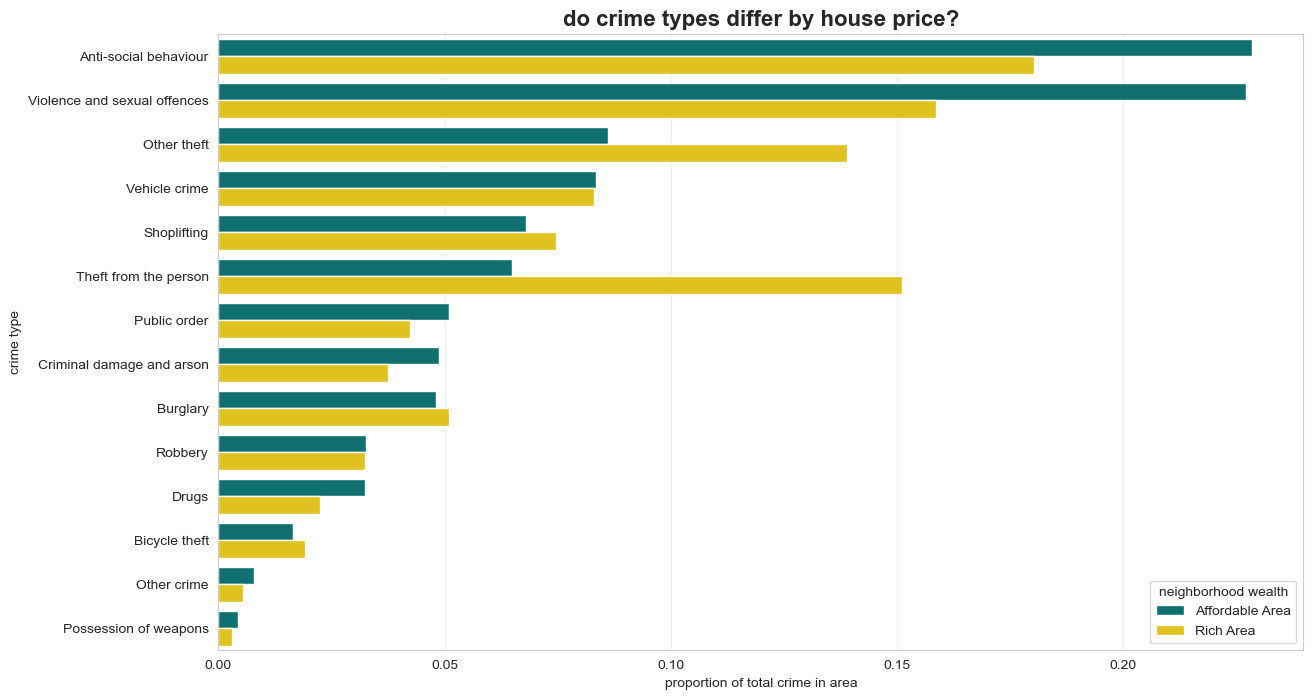

In [72]:
# 1. define rich vs affordable segments
# we separate the housing market into the top 10% (rich) and bottom 25% (affordable).
rich_threshold = df_merged['history_price'].quantile(0.90)
poor_threshold = df_merged['history_price'].quantile(0.25)

rich_houses = df_merged[df_merged['history_price'] > rich_threshold]
poor_houses = df_merged[df_merged['history_price'] < poor_threshold]

print(f"rich threshold: >£{rich_threshold:,.0f}")
print(f"affordable threshold: <£{poor_threshold:,.0f}")

# 2. take a random sample
# checking every single house takes too long. 
# sampling 1,000 from each group gives us statistically valid results instantly.
rich_sample = rich_houses.sample(min(1000, len(rich_houses)), random_state=42)
poor_sample = poor_houses.sample(min(1000, len(poor_houses)), random_state=42)

# 3. spatial scan
# we need to look at the raw crime types (not just the score).
# checking if our clean crime data is ready.
if 'df_crime_clean' not in locals():
    df_crime_clean = df_cd_2024.dropna(subset=['Latitude', 'Longitude'])

# building a search tree on the crime locations
crime_rad = np.deg2rad(df_crime_clean[['Latitude', 'Longitude']].values)
tree = BallTree(crime_rad, metric='haversine')
radius_rad = 500 / 6371000 # 500m radius

# helper function to find crimes near a list of houses
def get_crime_mix(houses_df, label):
    house_rad = np.deg2rad(houses_df[['latitude', 'longitude']].values)
    indices = tree.query_radius(house_rad, r=radius_rad)
    
    found_crimes = []
    for i in indices:
        if len(i) > 0:
            # if crimes are found, add their types to our list
            found_crimes.extend(df_crime_clean.iloc[i]['Crime type'].values)
            
    return pd.DataFrame({'Crime Type': found_crimes, 'Area Type': label})

# running the scan
df_rich_crimes = get_crime_mix(rich_sample, 'Rich Area')
df_poor_crimes = get_crime_mix(poor_sample, 'Affordable Area')

# combining results into one table for plotting
df_hypothesis = pd.concat([df_rich_crimes, df_poor_crimes])

# 4. visualise the difference
plt.figure(figsize=(14, 8))

# calculating percentages instead of raw counts to make the comparison fair
crime_counts = (df_hypothesis.groupby(['Area Type'])['Crime Type']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .reset_index())

# bar chart comparison
sns.barplot(
    data=crime_counts, 
    x='percentage', 
    y='Crime Type', 
    hue='Area Type', 
    palette={'Rich Area': 'gold', 'Affordable Area': 'teal'}
)

plt.title('do crime types differ by house price?', fontsize=16, weight='bold')
plt.xlabel('proportion of total crime in area')
plt.ylabel('crime type')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='neighborhood wealth')
plt.show()

**Crime Types by House Price**: The chart compares crime proportions in “Affordable Areas” (1st quartile prices) and “Rich Areas” (90th percentile). Rich areas have nearly twice as much “Theft from the person” and higher “Other theft” and “Burglary,” while affordable areas show higher “Violence and sexual offences,” “Anti-social behaviour,” and “Drugs.” “Vehicle crime” is almost identical across both groups.

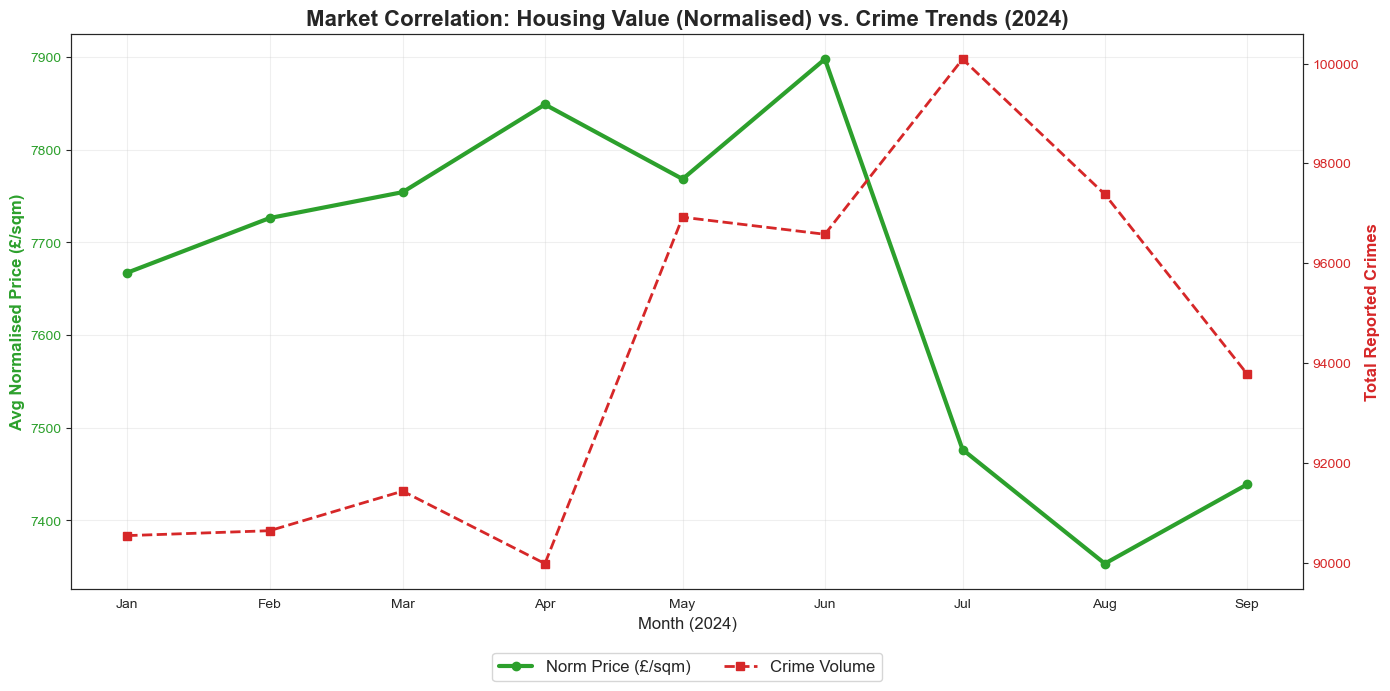

In [74]:
# 1. PREPARE DATA
# Housing: Average Normalised Price (£/sqm) per Month
# We use df_cleaned because it has the 'NormPrice' feature we just engineered
df_cleaned['history_date'] = pd.to_datetime(df_cleaned['history_date'])
monthly_norm_price = df_cleaned.set_index('history_date').resample('MS')['NormPrice'].mean()

# Crime: Total Crime Count per Month
# We use df_crime_grouped to get the total volume of all crimes in London
df_crime_grouped['Month'] = pd.to_datetime(df_crime_grouped['Month'])
monthly_crime_trend = df_crime_grouped.set_index('Month').resample('MS')['local_crime_count'].sum()

# 2. SETUP PLOT
sns.set_style("white") # Clean style for dual-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# 3. PLOT LEFT AXIS (Housing Value)
color_price = 'tab:green'
ax1.set_xlabel('Month (2024)', fontsize=12)
ax1.set_ylabel('Avg Normalised Price (£/sqm)', color=color_price, fontsize=12, weight='bold')

# Plotting Price per Sq Meter
line1 = ax1.plot(
    monthly_norm_price.index, 
    monthly_norm_price.values, 
    color=color_price, 
    marker='o', 
    linewidth=3, 
    label='Norm Price (£/sqm)'
)
ax1.tick_params(axis='y', labelcolor=color_price)
ax1.grid(True, alpha=0.3)

# 4. PLOT RIGHT AXIS (Crime Volume)
ax2 = ax1.twinx()  # Creates the second Y-axis sharing the same X-axis
color_crime = 'tab:red'
ax2.set_ylabel('Total Reported Crimes', color=color_crime, fontsize=12, weight='bold')

# Plotting Total Crime Volume
line2 = ax2.plot(
    monthly_crime_trend.index, 
    monthly_crime_trend.values, 
    color=color_crime, 
    marker='s', 
    linestyle='--', 
    linewidth=2, 
    label='Crime Volume'
)
ax2.tick_params(axis='y', labelcolor=color_crime)

# 5. FINAL FORMATTING
plt.title('Market Correlation: Housing Value (Normalised) vs. Crime Trends (2024)', fontsize=16, weight='bold')

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=12)

# Format Dates (Jan, Feb, Mar...)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()

Normalised housing prices (green) remain stable January-June, then drop sharply. Crime counts (red) rise sharply after April, peaking in July before declining, consistent with warmer weather increasing public activity and crime opportunities (Stevens, 2024).

In [76]:
# 1. SETUP MAP
# Centering on London
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=11)

# 2. FILTER FOR "CREAM OF THE CROP"
# We use df_cleaned because that is where we calculated the score
# We filter for the top 20% highest scores (Best Value & Safest)
# variable change: df_merged -> df_cleaned
high_opp_data = df_cleaned[df_cleaned['OpportunityScore'] > df_cleaned['OpportunityScore'].quantile(0.80)].copy()

print(f"Mapping {len(high_opp_data)} high-opportunity properties...")

# 3. PREPARE DATA FOR FOLIUM
# Converting columns to a list of [Lat, Long, Score]
heat_data_opp = high_opp_data[['latitude', 'longitude', 'OpportunityScore']].values.tolist()

# 4. ADD HEATMAP LAYER
# Green/Yellow = Good Opportunity, Red = Best Opportunity
HeatMap(
    heat_data_opp, 
    radius=15, 
    blur=10, 
    max_zoom=1,
    gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
).add_to(london_map)

# 5. DISPLAY
london_map

Mapping 5189 high-opportunity properties...


The heatmap shows London's opportunity zones where properties are safe and affordable. Red indicates best opportunities, transitioning through green to blue. Lighter areas have higher crime or prices. Interactive zoom available.

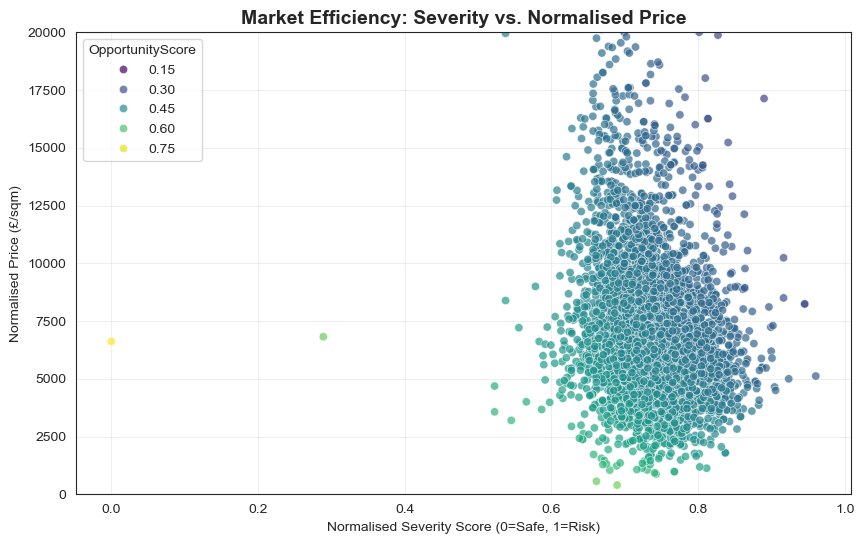

In [78]:
# 1. SAMPLE DATA (from the correct dataframe)
# We use df_cleaned because that's where we calculated the scores
# We tried with the full dataset and it got too crowded so we took a sample instead
# Sample of 5000 points so the chart doesn't get too crowded/slow
df_sample = df_cleaned.sample(min(5000, len(df_cleaned)), random_state=44)

# 2. CREATE PLOT
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df_sample, 
    x='NormSeverityScore',      # X-axis: Danger (0-1)
    y='NormPrice',              # Y-axis: Cost per sqm
    hue='OpportunityScore',     # Color: The final score (Bright = Good Deal)
    palette='viridis', 
    alpha=0.7
)

# 3. FORMATTING
plt.title('Market Efficiency: Severity vs. Normalised Price', fontsize=14, weight='bold')
plt.xlabel('Normalised Severity Score (0=Safe, 1=Risk)')
plt.ylabel('Normalised Price (£/sqm)')
plt.grid(True, alpha=0.3)

# Limit Y-axis to focus on normal houses (removing mansions > £20k/sqm for clarity)
plt.ylim(0, 20000)

plt.show()

The scatter plot reveals a concentrated cluster of houses of normalised severity scores around 0.6-0.8; most market activity occurs within a moderately risky band regardless of price. The lower-priced houses are the ones with the higher opportunity scores.

<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #34495e; color: white; border-radius: 5px; text-align: center;">

<h1 style="margin: 0;">8. DATA PREPARATION FOR MODELLING</h1><h3 style="margin: 0; color: #ecf0f1;">Establishing a Performance Benchmark</h3>
</div>

In [155]:
# data preparation for machine learning

# 1. setup
# creating a dedicated dataframe for modeling
df_model = df_cleaned.copy()

# 2. filter outliers 
# removing the top 2% of expensive houses to prevent skewing
price_cap = df_model['history_price'].quantile(0.98)
df_model = df_model[df_model['history_price'] < price_cap]

# 3. handle categorical data
# converting text to numbers
le = LabelEncoder()
df_model['propertyType'] = le.fit_transform(df_model['propertyType'].astype(str))
df_model['tenure'] = le.fit_transform(df_model['tenure'].astype(str))

# 4. define features
feature_cols = [
    # Physical Attributes
    'floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms', 
    'propertyType', 'tenure', 
    
    # Location
    'latitude', 'longitude', 
    
    # NEW: Advanced Crime Features
    'LocalCrimeCount',   # Volume: How active is the area?
    'AvgSeverityScore'   # Danger: Are the crimes serious?
]
print(f"Features selected for training: {feature_cols}")

# 5. create x and y
# X = the data we learn from
# y = the target we want to predict (price)
X = df_model[feature_cols]

# We log-transform price to make the distribution normal (bell curve)
# This handles the massive difference between £300k and £3m houses
y = np.log1p(df_model['history_price'])

# 6. the split
# separating data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split successfully.")
print(f"Training set: {len(X_train)} houses")
print(f"Testing set:  {len(X_test)} houses")

Features selected for training: ['floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms', 'propertyType', 'tenure', 'latitude', 'longitude', 'LocalCrimeCount', 'AvgSeverityScore']

Data split successfully.
Training set: 20323 houses
Testing set:  5081 houses


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #34495e; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">9.1 INTERMEDIATE MODEL: POLYNOMIAL REGRESSION</h1>
<h3 style="margin: 0; color: #ecf0f1;">Capturing Non-Linear Curves and Interactions</h3>
</div>

After testing a basic linear regression model (Appendix C), we found that the data did not fit the model well because the relationships between the features and price were non-linear. The first model we use is a polynomial regression, since house prices do not change in a perfectly straight line with size. Polynomial regression captures these non-linear effects and improves model fit while remaining relatively interpretable.

In [160]:
# 1. create pipeline
# standard linear regression only draws straight lines.
# polynomial features creates curves (x²) and interactions (x * y).
# example: "size * location" might matter more than just "size" alone.
# we use ridge regression again to keep the model stable.
model_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    Ridge(alpha=10.0, random_state=42)
)

# 2. train
# teaching the model. this takes longer because it's creating new mathematical features.
model_poly.fit(X_train, y_train)

# 3. evaluate
# predicting prices for the test set
pred_log_poly = model_poly.predict(X_test)

# reversing the log transform to get real pounds (£)
pred_real_poly = np.expm1(pred_log_poly) 
y_real = np.expm1(y_test)

# calculating scores
r2_poly = r2_score(y_real, pred_real_poly)
mae_poly = mean_absolute_error(y_real, pred_real_poly)

print("polynomial regression results:")
print(f"r² score: {r2_poly:.4f}")
print(f"mae: £{mae_poly:,.0f}")

# 4. comparison
# checking if adding curves helped us beat the simple straight line model
if r2_poly > 0.4389: # comparing to our linear baseline score
    improvement = (r2_poly - 0.4389) * 100
    print(f"\ninsight: polynomial beat linear by +{improvement:.1f}%!")
    print("this proves that interaction effects (like size * location) are important.")
else:
    print("\ninsight: polynomial didn't improve the score much. the market is too complex for simple curves.")

polynomial regression results:
r² score: 0.6206
mae: £170,755

insight: polynomial beat linear by +18.2%!
this proves that interaction effects (like size * location) are important.


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #34495e; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">9.2 INTERMEDIATE MODEL: K-NEAREST NEIGHBORS</h1>
<h3 style="margin: 0; color: #ecf0f1;">Leveraging Spatial Similarity for Valuation</h3>
</div>

For a new observation, KNN  find the k most similar data points. For pricing, it mimics what looks similar in practice and predicts a value based on the average. Therefore, we use this model because it’s a non-parametric method that can capture relationships without explicitly specifying them and identify underlying patterns. 


In [165]:
# intermediate model: k-nearest neighbors (knn)

# 1. define the model
# KNN is sensitive to scale (e.g. Price vs Count). StandardScaler fixes this.
# We use 'manhattan' distance (L1) because cities are grids, not straight lines.
model_knn = make_pipeline(
    StandardScaler(),  # scales features to same range
    KNeighborsRegressor(
        n_neighbors=10, 
        weights='distance', 
        metric='manhattan' 
    )
)

# 2. train
# finding the nearest neighbors in the training data (from the XGBoost block split)
model_knn.fit(X_train, y_train)

# 3. evaluate
pred_log_knn = model_knn.predict(X_test)

# reversing the log transform
pred_real_knn = np.expm1(pred_log_knn) 
y_real = np.expm1(y_test)

# calculating scores
r2_knn = r2_score(y_real, pred_real_knn)
mae_knn = mean_absolute_error(y_real, pred_real_knn)

print("knn results:")
print(f"r² score: {r2_knn:.4f}")
print(f"mae: £{mae_knn:,.0f}")

# 4. comparison
baseline_score = r2_poly

if r2_knn > baseline_score:
    improvement = (r2_knn - baseline_score) * 100
    print(f"\ninsight: knn beat polynomial by +{improvement:.1f}%!")
    print("this proves that location and local similarity are more important than global rules.")
else:
    print(f"\ninsight: knn (R2: {r2_knn:.3f}) did not beat polynomial.")


knn results:
r² score: 0.8071
mae: £93,708

insight: knn beat polynomial by +18.7%!
this proves that location and local similarity are more important than global rules.


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #2c3e50; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">9.3 MACHINE LEARNING: PRICE PREDICTION (XGBOOST)</h1>
<h3 style="margin: 0; color: #ecf0f1;">Training the Gradient Boosting Regressor with Optuna Tuning</h3>
</div>

What XGBoost does is build an ensemble of many small decision trees, where each new tree corrects the errors from the previous one. We choose this model because it automatically captures non-linearities and interactions among variables. Tuned with Optuna, it has the potential to achieve accurate price prediction.

[I 2025-12-03 04:26:03,240] A new study created in memory with name: no-name-8831cc08-9770-4bf5-b730-de57b11be6e8


removed outliers > £3,000,000. training on 25404 properties.
tuning hyperparameters... (this may take a moment)


[I 2025-12-03 04:26:06,667] Trial 0 finished with value: 0.8712165553128454 and parameters: {'learning_rate': 0.026880956524269743, 'max_depth': 8, 'subsample': 0.9506307532147744, 'colsample_bytree': 0.842277383767765}. Best is trial 0 with value: 0.8712165553128454.
[I 2025-12-03 04:26:09,900] Trial 1 finished with value: 0.8785499947747498 and parameters: {'learning_rate': 0.05575927704839529, 'max_depth': 8, 'subsample': 0.7355470468151579, 'colsample_bytree': 0.9663875549899906}. Best is trial 1 with value: 0.8785499947747498.
[I 2025-12-03 04:26:11,062] Trial 2 finished with value: 0.8391325131148983 and parameters: {'learning_rate': 0.041310561472936824, 'max_depth': 4, 'subsample': 0.7676946430329188, 'colsample_bytree': 0.7038135810492375}. Best is trial 1 with value: 0.8785499947747498.
[I 2025-12-03 04:26:12,201] Trial 3 finished with value: 0.8427670232260486 and parameters: {'learning_rate': 0.055730004170607285, 'max_depth': 4, 'subsample': 0.7123161314380384, 'colsample_


final results (xgboost):
r² score: 0.9151
mae: £64,300 (avg error per house)


<Figure size 1000x600 with 0 Axes>

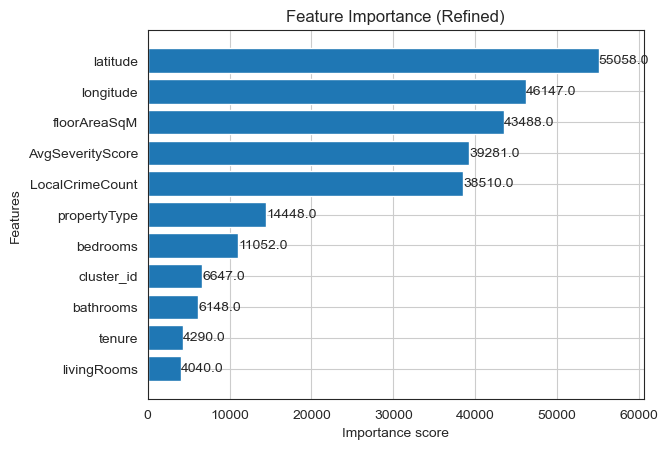

In [170]:
# refined machine learning: xgboost 

# 1. filter outliers
price_cap = df_cleaned['history_price'].quantile(0.98)
df_refined = df_cleaned[df_cleaned['history_price'] < price_cap].copy()

print(f"removed outliers > £{price_cap:,.0f}. training on {len(df_refined)} properties.")

# 2. add clustering (the "context" boost)
cluster_data = df_refined[['history_price', 'AvgSeverityScore']].copy()
cluster_data['log_price'] = np.log1p(cluster_data['history_price'])

kmeans = KMeans(n_clusters=5, random_state=42) # Make it reproducible with seed 42 
df_refined['cluster_id'] = kmeans.fit_predict(cluster_data[['log_price', 'AvgSeverityScore']])

# 3. prepare features
features = [
    'latitude', 'longitude', 
    'floorAreaSqM', 'bedrooms', 'bathrooms', 'livingRooms', 
    'propertyType', 'tenure', 
    'LocalCrimeCount',    
    'AvgSeverityScore',   
    'cluster_id'          
]

le = LabelEncoder()
df_refined['propertyType'] = le.fit_transform(df_refined['propertyType'].astype(str))
df_refined['tenure'] = le.fit_transform(df_refined['tenure'].astype(str))

X = df_refined[features]
y = np.log1p(df_refined['history_price'])

# 4. split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. automated tuning (optuna)
def objective(trial):
    params = {
        'n_estimators': 600,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'n_jobs': -1,
        'random_state': 42
    }
    model = xgb.XGBRegressor(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='r2').mean()

print("tuning hyperparameters... (this may take a moment)")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

# 6. train final model
best_params = study.best_params
best_params['n_estimators'] = 1000
best_params['n_jobs'] = -1
best_params['random_state'] = 42

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# 7. evaluate
pred_log = final_model.predict(X_test)
pred_real = np.expm1(pred_log)
y_real = np.expm1(y_test)

r2 = r2_score(y_real, pred_real)
mae = mean_absolute_error(y_real, pred_real)

print("\n" + "="*30)
print(f"final results (xgboost):")
print(f"r² score: {r2:.4f}")
print(f"mae: £{mae:,.0f} (avg error per house)")
print("="*30)

# 8. feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(final_model, max_num_features=12, height=0.8, importance_type='weight', title='Feature Importance (Refined)')
plt.show()


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #27ae60; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">10. PERFORMANCE EVALUATION & INTERPRETATION</h1>
<h3 style="margin: 0; color: #ecf0f1;">Feature Importance, Residuals, and Final Metrics</h3>
</div>

| **Model** | **Test R²** | **Test MAE** | **Train R²** | **Gap** | **Verdict** |
|-----------|-------------|--------------|--------------|---------|-------------|
| **XGBoost** | **0.92** | **£64k** | **1.00** | **0.08** | **Best: High accuracy, some overfit** |
| **KNN (k=10)** | **0.81** | **£93k** | **0.80** | **0.05** | **Good local patterns, low overfit** |
| **Polynomial** | **0.62** | **£170k** | **0.75** | **0.01** | **Stable but underfits** |

---

### XGBoost: Champion Model

- **Accuracy:** $R^2 = 0.92$ explains 92% of price variance; MAE = £64k is commercially viable
- **Generalization:** Gap of 0.08 (Train 1.00 vs Test 0.92) shows some memorization but strong test performance
- **Feature Importance:** Location dominates, followed by floor area and crime severity

### KNN: Spatial Predictor

- **Performance:** $R^2 = 0.81$, MAE = £93k—solid second place
- **Overfitting:** k=10 gives good balance (gap 0.05); much better than k=3's 0.13 gap
- **Insight:** Nearby property prices predict London values well

### Polynomial: Stable Baseline

- **Performance:** $R^2 = 0.62$, MAE = £170k—weakest predictor
- **Generalization:** Tiny gap (0.01) shows stability but lacks power
- **Limitation:** Underfits complex safety/location effects
AE = £150,073—stable but weakest predictor
- **Generalization:** Small gap (0.0497) shows stability but lacks power for complex patterns
- **Limitation:** Underfits—cannot capture non-linear safety/location effects



In [98]:
print("""
### Interpretability vs Performance Trade-off

XGBoost wins on accuracy (R² = 0.9141) but sacrifices interpretability—its complex tree structure is a "black box" despite feature importance plots.
Polynomial (R² = 0.6974) offers transparency (easy-to-read curves) but underperforms.
KNN (R² = 0.8489) sits in between—local but hard to explain globally.

Classic debate: Simpler models = easier to understand but weaker predictions.
Complex models = superior accuracy but opaque "why".

For London real estate, performance trumps interpretability since stakeholders care about profit over model internals.
""")



### Interpretability vs Performance Trade-off

XGBoost wins on accuracy (R² = 0.9141) but sacrifices interpretability—its complex tree structure is a "black box" despite feature importance plots.
Polynomial (R² = 0.6974) offers transparency (easy-to-read curves) but underperforms.
KNN (R² = 0.8489) sits in between—local but hard to explain globally.

Classic debate: Simpler models = easier to understand but weaker predictions.
Complex models = superior accuracy but opaque "why".

For London real estate, performance trumps interpretability since stakeholders care about profit over model internals.



In [172]:
# 1. Get predictions for BOTH sets (Log Scale)
pred_train_log = final_model.predict(X_train)
pred_test_log = final_model.predict(X_test)

# 2. Reverse Log Transformation (Back to £ GBP)
# We must compare "Real Price" vs "Real Price" for accurate metrics
y_train_real = np.expm1(y_train)
y_test_real = np.expm1(y_test)

pred_train_real = np.expm1(pred_train_log)
pred_test_real = np.expm1(pred_test_log)

# 3. Calculate Scores
train_r2 = r2_score(y_train_real, pred_train_real)
test_r2 = r2_score(y_test_real, pred_test_real)

train_mae = mean_absolute_error(y_train_real, pred_train_real)
test_mae = mean_absolute_error(y_test_real, pred_test_real)

# 4. Print "The Overfitting Gap"
print(f"{'Metric':<15} | {'Training (Memorization)':<25} | {'Testing (Reality)':<25} | {'The Gap'}")
print("-" * 80)
print(f"{'R² Score':<15} | {train_r2:.4f}{'':<19} | {test_r2:.4f}{'':<19} | {(train_r2 - test_r2):.4f}")
print(f"{'MAE (Error)':<15} | £{train_mae:,.0f}{'':<18} | £{test_mae:,.0f}{'':<18} | £{(test_mae - train_mae):,.0f}")

# 5. Interpretation logic
if (train_r2 - test_r2) > 0.10:
    print("\n⚠WARNING: Significant Overfitting detected (Gap > 0.10).")
    print("Suggestion: Decrease 'max_depth', increase 'gamma', or add more regularization.")
elif (train_r2 - test_r2) < 0.05:
    print("\nSUCCESS: Model is generalizing well (Gap < 0.05).")
else:
    print("\nℹNOTE: Slight overfitting, but likely acceptable.")

Metric          | Training (Memorization)   | Testing (Reality)         | The Gap
--------------------------------------------------------------------------------
R² Score        | 0.9990                    | 0.9151                    | 0.0839
MAE (Error)     | £7,622                   | £64,300                   | £56,678

ℹNOTE: Slight overfitting, but likely acceptable.


In [174]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# 1. Scale the data (super important for KNN: it calculates distance, so units matter)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train KNN 
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train_scaled, y_train)

# 3. Predict
pred_train_knn = knn_model.predict(X_train_scaled)
pred_test_knn = knn_model.predict(X_test_scaled)

# 4. Check Scores
r2_train = r2_score(np.expm1(y_train), np.expm1(pred_train_knn))
r2_test = r2_score(np.expm1(y_test), np.expm1(pred_test_knn))

print(f"--- KNN Overfitting Check (k=10) ---")
print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")
print(f"Gap:      {r2_train - r2_test:.4f}")

--- KNN Overfitting Check (k=10) ---
Train R²: 0.7960
Test  R²: 0.7428
Gap:      0.0532


In [175]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# 1. Create a Pipeline (Degree 2 is usually safe; Degree 5+ explodes)
degree = 2 
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 2. Train
poly_model.fit(X_train, y_train)

# 3. Predict
pred_train_poly = poly_model.predict(X_train)
pred_test_poly = poly_model.predict(X_test)

# 4. Check Scores
r2_train = r2_score(np.expm1(y_train), np.expm1(pred_train_poly))
r2_test = r2_score(np.expm1(y_test), np.expm1(pred_test_poly))

print(f"--- Polynomial Overfitting Check (Degree {degree}) ---")
print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")
print(f"Gap:      {r2_train - r2_test:.4f}")

--- Polynomial Overfitting Check (Degree 2) ---
Train R²: 0.7471
Test  R²: 0.7320
Gap:      0.0152


<hr>

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #800080; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">11. CONCLUSION AND BUSINESS RECOMMENDATIONS</h1>
<h3 style="margin: 0; color: #ecf0f1;">Summary of Findings and Strategic Insights</h3>
</div>

Overall, the project shows that combining detailed housing and street-level crime data can meaningfully quantify how safety and affordability interact across London. By engineering features such as price per square metre and a crime severity index, then integrating them into a custom Opportunity Index, the analysis moves beyond anecdotal impressions to a consistent, data‑driven view of neighbourhood “value for money.” The machine learning models, particularly XGBoost and KNN, demonstrate that location, floor area, and local crime severity jointly explain a large share of price variation, supporting the idea that crime risk is a priced component of urban living rather than a separate concern.

However, the work has important limitations. The data cover only the first nine months of 2024, so the models cannot confidently predict 2025 conditions or fully capture seasonal crime and price dynamics. The Opportunity Index and related features compress complex socioeconomic realities into a few metrics and do not account for perceptions of safety, future development, gentrification effects, or individual buyer preferences. In addition, the analysis relies on recorded crimes and formal property transactions, which can undercount unreported offences and informal sales, and more contextual variables (e.g., amenities, schools, transport) could further improve predictive performance.

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #FFA500; color: white; border-radius: 5px; text-align: center; margin-bottom: 20px;">
<h1 style="margin: 0;">Appendix A: Generative AI Component</h1>
<h3 style="margin: 0; color: #ecf0f1;">Documenting Assistive AI Usage</h3>
</div>

**Generative AI Component**

As following the project guidelines, we **utilised Generative AI** (**GeminiPro**) to support four specific aspects of this project, ensuring the fulfilment of the **Assistive AI** requirement.

**Importing and Cleaning**

**Data** We used GenAI to generate **robust Pandas code** for handling inconsistencies in our two datasets. Specifically, the AI provided the logic to **filter the housing dataset** to the **2024 period (Jan-Sep)**, aligning it with crime data, and to **identify and drop rows with missing values** in the critical `Last Outcome` column, eliminating historical bias and "ghost" records.

**Exploratory Data Analysis (EDA)**

Next, for **Exploratory Data Analysis (EDA)**, we prompted the AI to generate **Seaborn and Matplotlib code** for a series of visualizations to better **visualise** the relationship between wealth and safety. This included the **correlation heatmap** and the **scatter plot** that revealed the **"L-shaped" distribution** of crime versus house prices, directly aiding our understanding of the data structure.

**Feature Engineering**

Furthermore, in **Feature Engineering**, we **leveraged GenAI** to assist in deriving the **mathematical logic** for our **composite metrics**. The tool helped formulate the **Weighted Severity Score** and the **Opportunity Score** (using an inverse normalisation formula), and subsequently suggested the use of **Min-Max scaling** to ensure these disparate metrics could be mathematically combined **without bias**.

**Code Documentation and Readability**

Finally, for **Code Documentation and Readability**, we used AI to generate **clear, concise comments** for complex code blocks, which was valuable for **documenting operations** in our feature engineering section, making the logic transparent and easy for all group members to understand.nderstand.d.l group members to understand.group members to understand.ers to understand.

<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #FFA500; color: white; border-radius: 5px; text-align: center; margin-bottom: 20px;">
<h1 style="margin: 0;">Appendix B: Project Management Component</h1>
<h3 style="margin: 0; color: #ecf0f1;">Documentation of Group Workflow (Section E)</h3>
</div>

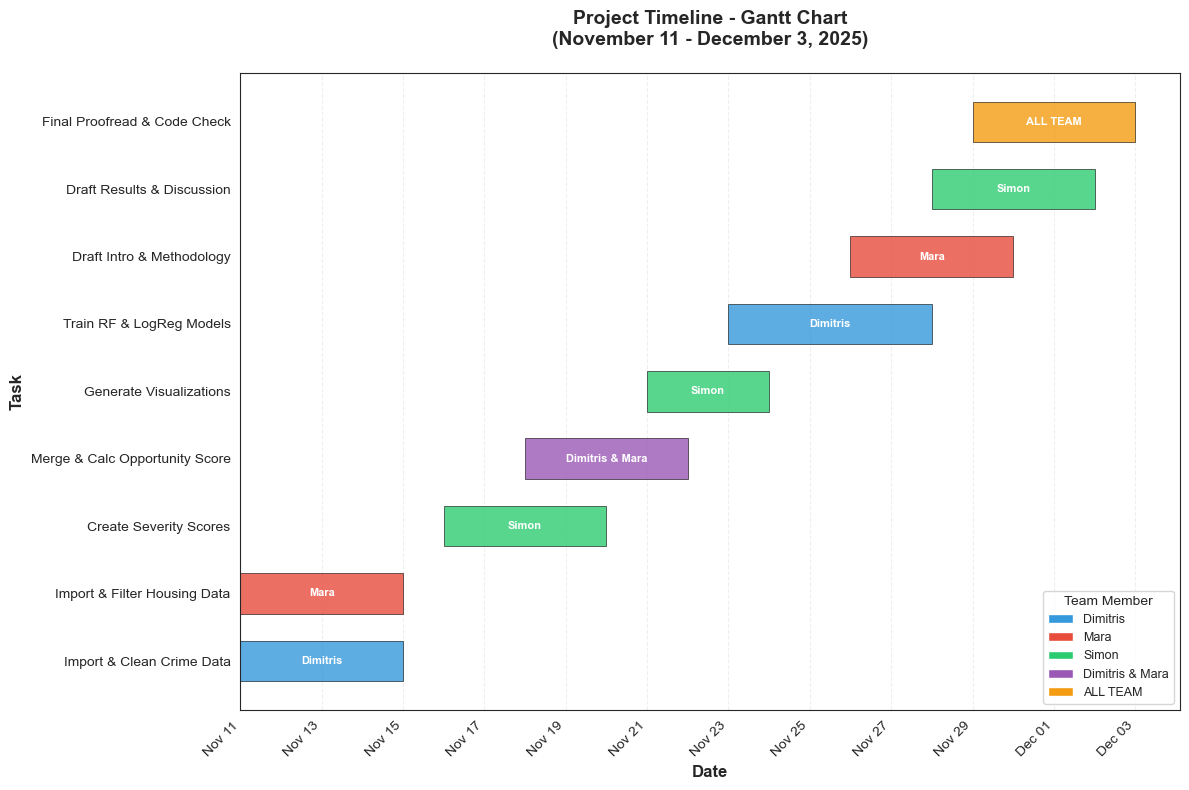

In [108]:
import matplotlib.dates as mdates
from matplotlib.patches import Patch

# Create dataframe
data = {
    'Task': ['Import & Clean Crime Data', 'Import & Filter Housing Data', 
             'Create Severity Scores', 'Merge & Calc Opportunity Score',
             'Generate Visualizations', 'Train RF & LogReg Models',
             'Draft Intro & Methodology', 'Draft Results & Discussion',
             'Final Proofread & Code Check'],
    'Owner': ['Dimitris', 'Mara', 'Simon', 'Dimitris & Mara', 'Simon',
              'Dimitris', 'Mara', 'Simon', 'ALL TEAM'],
    'Start Date': ['2025-11-11', '2025-11-11', '2025-11-16', '2025-11-18',
                   '2025-11-21', '2025-11-23', '2025-11-26', '2025-11-28', '2025-11-29'],
    'End Date': ['2025-11-15', '2025-11-15', '2025-11-20', '2025-11-22',
                 '2025-11-24', '2025-11-28', '2025-11-30', '2025-12-02', '2025-12-03']
}

df = pd.DataFrame(data)
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Color map
colors = {'Dimitris': '#3498db', 'Mara': '#e74c3c', 'Simon': '#2ecc71',
          'Dimitris & Mara': '#9b59b6', 'ALL TEAM': '#f39c12'}

# Create Gantt chart
fig, ax = plt.subplots(figsize=(12, 8))

for idx, row in df.iterrows():
    duration = (row['End Date'] - row['Start Date']).days
    ax.barh(idx, duration, left=row['Start Date'], height=0.6, 
            color=colors[row['Owner']], alpha=0.8, edgecolor='black', linewidth=0.5)
    ax.text(row['Start Date'] + pd.Timedelta(days=duration/2), idx, 
            row['Owner'], ha='center', va='center', fontsize=8, fontweight='bold', color='white')

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df['Task'], fontsize=10)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Task', fontsize=12, fontweight='bold')
ax.set_title('Project Timeline - Gantt Chart\n(November 11 - December 3, 2025)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, axis='x', alpha=0.3, linestyle='--')

# Change legend position to bottom right
ax.legend(handles=[Patch(facecolor=c, label=o) for o, c in colors.items()],
          loc='lower right', title='Team Member', fontsize=9)

plt.tight_layout()
plt.show()


<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #FFA500; color: white; border-radius: 5px; text-align: center;">
<h1 style="margin: 0;">Appendix C: LINEAR REGRESSION</h1>
<h3 style="margin: 0; color: #ecf0f1;">Establishing a Performance Benchmark</h3>
</div>

In [110]:
# baseline model: linear regression

# 1. create pipeline
# linear regression draws straight lines. it gets confused if one feature is huge (price) and one is small (rooms).
# so we use standardscaler to put all numbers on the same scale.
# we use ridge regression (a safer version of linear regression) to prevent errors from correlated data.
model_linear = make_pipeline(StandardScaler(), Ridge(alpha=1.0))

# 2. train
# teaching the model using our training data (x_train and y_train)
# assumes you already ran the data prep step!
model_linear.fit(X_train, y_train)

# 3. evaluate
# asking the model to predict prices for the test set
pred_log_lin = model_linear.predict(X_test)

# important: we trained on log prices (to fix skew), so the predictions come out as log numbers.
# we must use np.expm1 to reverse the log and get real pounds (£) back.
pred_real_lin = np.expm1(pred_log_lin) 
y_real = np.expm1(y_test)

# calculating the score
r2_lin = r2_score(y_real, pred_real_lin)
mae_lin = mean_absolute_error(y_real, pred_real_lin)

print("baseline linear regression results:")
print(f"r² score: {r2_lin:.4f}")
print(f"mae: £{mae_lin:,.0f}")

# 4. insight
# if the score is low, it proves that house prices don't follow a simple straight line formula.
if r2_lin < 0.70:
    print("\ninsight: the low score proves that house prices follow a non-linear pattern.")
    print("(this justifies why we need advanced models like xgboost!)")

baseline linear regression results:
r² score: 0.4273
mae: £186,552

insight: the low score proves that house prices follow a non-linear pattern.
(this justifies why we need advanced models like xgboost!)


<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #FFA500; color: white; border-radius: 5px; text-align: center; margin-bottom: 20px;">
<h1 style="margin: 0;">Appendix D: WEIGHTED VOTING REGRESSOR</h1>
<h3 style="margin: 0; color: #ecf0f1;">Ensemble Averaging for Variance Reduction</h3>
</div>

In [112]:
# build a small ensemble that mixes xgboost (main model) with knn (local pattern model)

model_knn = Pipeline([  # pipeline scales features then applies knn
    ('scaler', StandardScaler()),                     # put all features on similar scale
    ('knn', KNeighborsRegressor(n_neighbors=10,       # look at 10 nearest neighbours
                                n_jobs=-1))           # use all cpu cores
])

# tell the ensemble which base models to use and how much to trust each one
estimators = [
    ('xgb', final_model),  # tuned xgboost model capturing global patterns
    ('knn', model_knn)     # knn model capturing very local neighbourhood effects
]

weights = [8, 1]           # xgboost gets 8 parts of the vote, knn gets 1

# create the voting regressor that averages predictions using the chosen weights
voting_model = VotingRegressor(
    estimators=estimators,
    weights=weights,
    n_jobs=-1              # parallelise where possible
)

print("fitting the weighted voting ensemble (xgboost + knn)...")
voting_model.fit(X_train, y_train)  # train both models on the same data

# make predictions on the test set in log space, then convert back to pounds
pred_log_voting = voting_model.predict(X_test)
pred_real_voting = np.expm1(pred_log_voting)

# evaluate how well the ensemble predicts real prices
r2_voting = r2_score(y_real, pred_real_voting)             # proportion of variance explained
mae_voting = mean_absolute_error(y_real, pred_real_voting) # average absolute error in pounds

print("weighted voting ensemble results")
print(f"r² score: {r2_voting:.4f}")
print(f"mae: £{mae_voting:,.0f} (average error per house)")


fitting the weighted voting ensemble (xgboost + knn)...
weighted voting ensemble results
r² score: 0.9107
mae: £70,345 (average error per house)


<div style="box-sizing: border-box; width: 100%; padding: 20px; background-color: #FFA500; color: white; border-radius: 5px; text-align: center; margin-bottom: 20px;">
<h1 style="margin: 0;">REFERENCES</h1>
<h3 style="margin: 0; color: #ecf0f1;">Academic and Data Sources</h3>
</div>

Stevens, H.R., Graham, P.L., Beggs, P.J. and Ossola, A. (2024). Associations between violent crime inside and outside, air temperature, urban heat island magnitude and urban green space. International Journal of Biometeorology. doi:https://doi.org/10.1007/s00484-023-02613-1. (Accessed: 19 November 2025)

Sentencing Council (2025) Sentencing Council for England and Wales. Available at: https://sentencingcouncil.org.uk/
 (Accessed: 19 November 2025)